<a href="https://colab.research.google.com/github/QuanShi-226/Bias-Identification-Demo/blob/main/A1_QuanShi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code loads ARFF files from Google Drive and converts them into pandas DataFrames for data analysis.


In [1]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
from scipy.io import arff

# Specify the path of the ARFF files
data_class_path = '/content/drive/MyDrive/18668/A1-files/data-class.arff'
feature_envy_path = '/content/drive/MyDrive/18668/A1-files/feature-envy.arff'
god_class_path = '/content/drive/MyDrive/18668/A1-files/god-class.arff'
long_method_path = '/content/drive/MyDrive/18668/A1-files/long-method.arff'

# Function to load ARFF files
def load_arff_file(file_path):
    data, meta = arff.loadarff(file_path)
    df = pd.DataFrame(data)
    return df

# Load the data-class ARFF file into a DataFrame
data_class_df = load_arff_file(data_class_path)
# Load the other ARFF files (currently commented out)
#feature_envy_df = load_arff_file(feature_envy_path)
#god_class_df = load_arff_file(god_class_path)
#long_method_df = load_arff_file(long_method_path)

# View the first few rows of the dataset (currently commented out)
print(data_class_df.head())


Mounted at /content/drive
   NOII_type  NOAM_type  NOCS_type  NOM_type  NMO_type  ATFD_type  \
0        0.0        0.0        0.0       6.0       0.0        3.0   
1        0.0        0.0        0.0       2.0       2.0        0.0   
2        0.0        0.0        0.0       7.0       0.0        2.0   
3        0.0        0.0        0.0       1.0       0.0        0.0   
4        0.0        0.0        0.0       4.0       0.0        0.0   

   FANOUT_type  NOMNAMM_type  NOA_type  NIM_type  ...  \
0          1.0           6.0       2.0      32.0  ...   
1          0.0           2.0       4.0      30.0  ...   
2          1.0           7.0       3.0      32.0  ...   
3          0.0           1.0       2.0      32.0  ...   
4          2.0           4.0       1.0      32.0  ...   

   number_not_abstract_not_final_methods  number_static_methods  \
0                                    6.0                    0.0   
1                                    2.0                    0.0   
2              

I only focus on the data-class.arff data set.

# This code checks for missing values, calculates missing percentages, analyzes True/False distributions, and visualizes feature and categorical distributions in the dataset.

Missing values:
 NOII_type                                            0
NOAM_type                                            0
NOCS_type                                            0
NOM_type                                             0
NMO_type                                            39
                                                    ..
number_not_final_not_static_methods                  0
number_standard_design_methods                       0
number_constructor_DefaultConstructor_methods        0
number_constructor_NotDefaultConstructor_methods     0
is_data_class                                        0
Length: 62, dtype: int64

Missing percentage for 'NMO_type': 4.64%

True/False counts for 'is_data_class':
 is_data_class
b'false'    700
b'true'     140
Name: count, dtype: int64


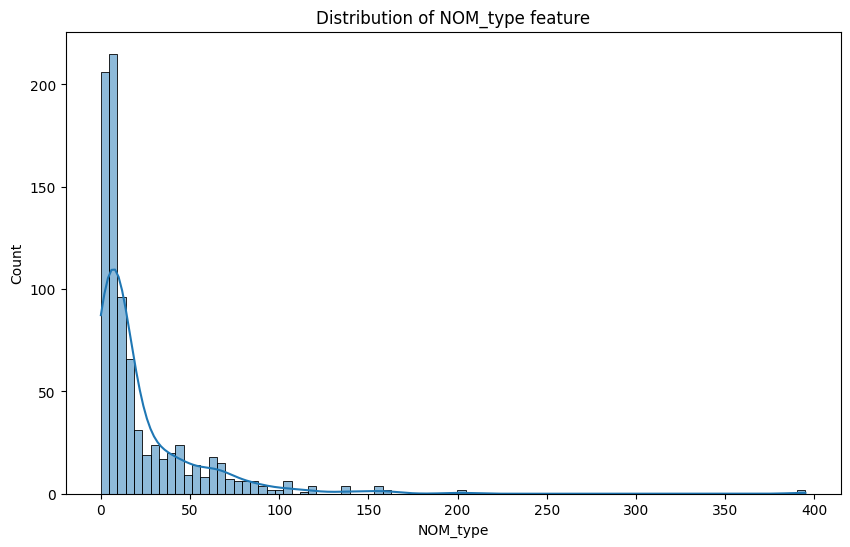

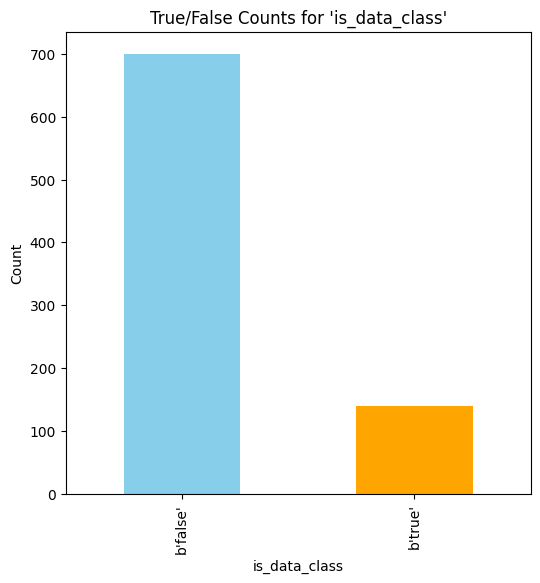

In [2]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Check for missing values in the DataFrame
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing values:\n", missing_values)
    return missing_values

# 2. Calculate the percentage of missing values in a specific column ('NMO_type')
def calculate_missing_percentage(df, column):
    missing_percentage = (df[column].isnull().sum() / len(df)) * 100
    print(f"\nMissing percentage for '{column}': {missing_percentage:.2f}%")
    return missing_percentage

# 3. Count the distribution of True/False values in a specific column ('is_data_class')
def count_true_false(df, column):
    true_false_counts = df[column].value_counts()
    print(f"\nTrue/False counts for '{column}':\n", true_false_counts)
    return true_false_counts

# 4. Visualize the distribution of a specific feature using a histogram
def visualize_feature_distribution(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature} feature")
    plt.show()

# 5. Visualize the True/False counts using a bar chart
def visualize_true_false_distribution(true_false_counts):
    plt.figure(figsize=(6, 6))
    true_false_counts.plot(kind='bar', color=['skyblue', 'orange'])
    plt.title("True/False Counts for 'is_data_class'")
    plt.ylabel("Count")
    plt.show()

# Execution flow

# 1. Check for missing values in the DataFrame
missing_values = check_missing_values(data_class_df)

# 2. Calculate the percentage of missing values in the 'NMO_type' column
nmo_missing_percentage = calculate_missing_percentage(data_class_df, 'NMO_type')

# 3. Count the distribution of True/False values in the 'is_data_class' column
true_false_counts = count_true_false(data_class_df, 'is_data_class')

# 4. Visualize the distribution of the 'NOM_type' feature
visualize_feature_distribution(data_class_df, 'NOM_type')

# 5. Visualize the True/False counts for the 'is_data_class' column
visualize_true_false_distribution(true_false_counts)

1. **Missing Value Analysis**  
   In the dataset, the 'NMO_type' feature has 39 missing values, which account for 4.64% of the total dataset. At this stage, these missing values seem to have a relatively minor impact on the overall dataset.

2. **Class Imbalance Analysis**  
   The distribution of True/False in the 'is_data_class' column is highly imbalanced:  
   - False: 700  
   - True: 140  
   This class imbalance may cause the model to be biased towards predicting the false class.

3. **Feature Skewness Analysis**  
   Analyzing the 'NOM_type' feature reveals that it has a strong skewed distribution. Most samples have low NOM values, while a few samples have very high values. This uneven feature distribution may lead to poor model performance when handling this feature.

# This code visualizes the distribution of all numeric features in the dataset and calculates the skewness for each of those features.

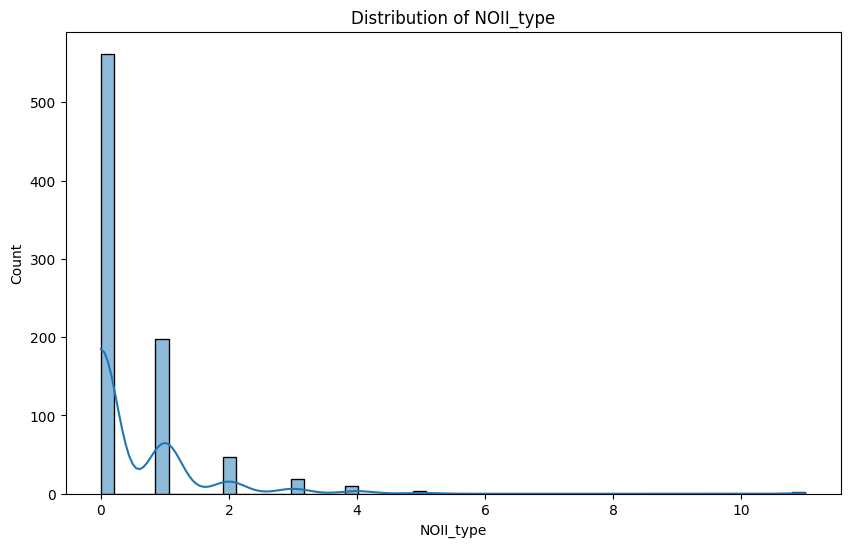

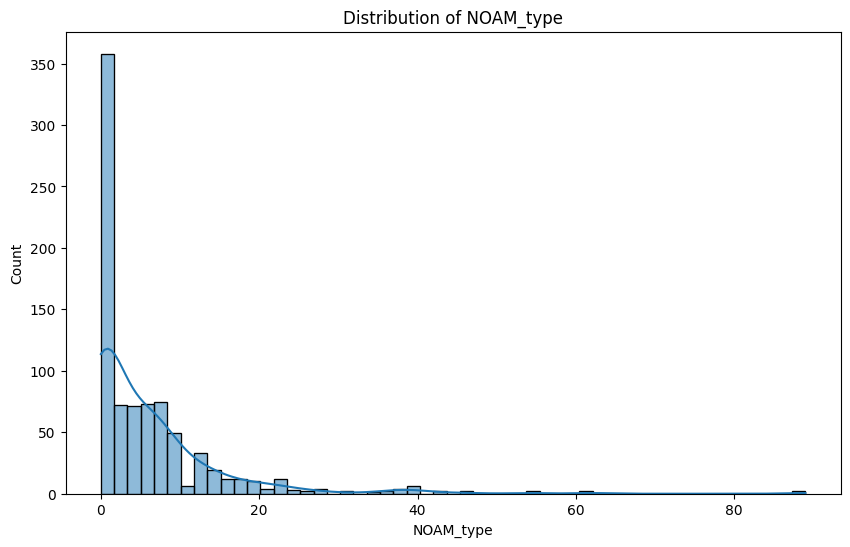

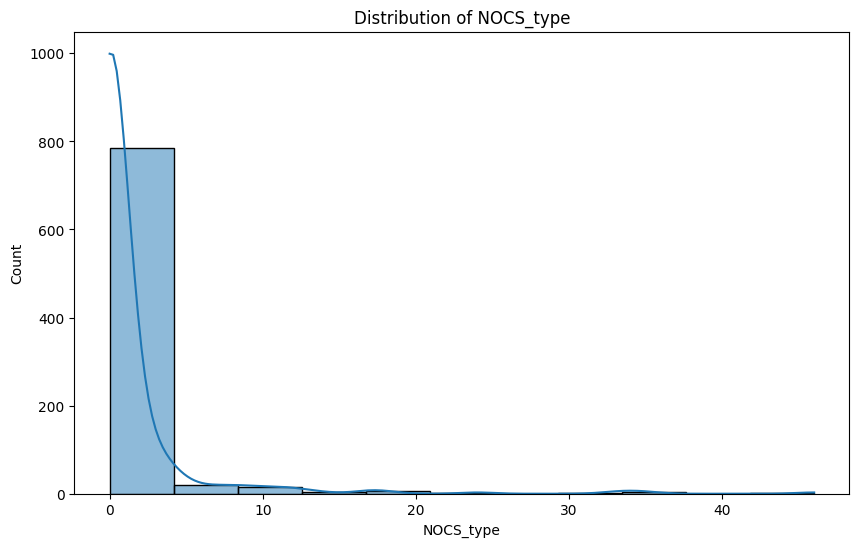

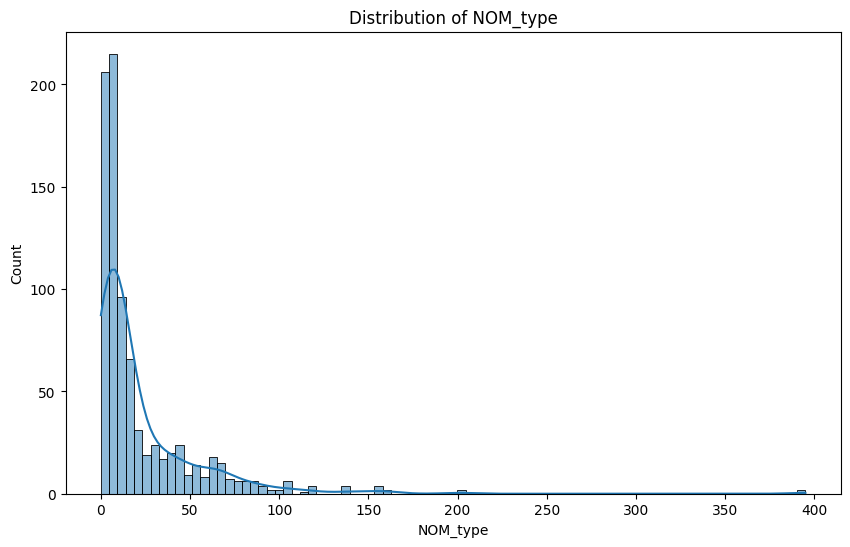

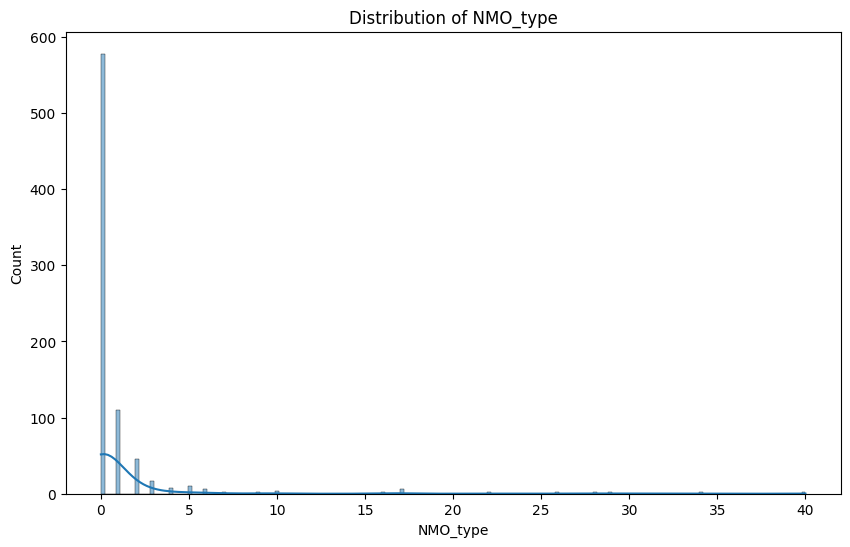

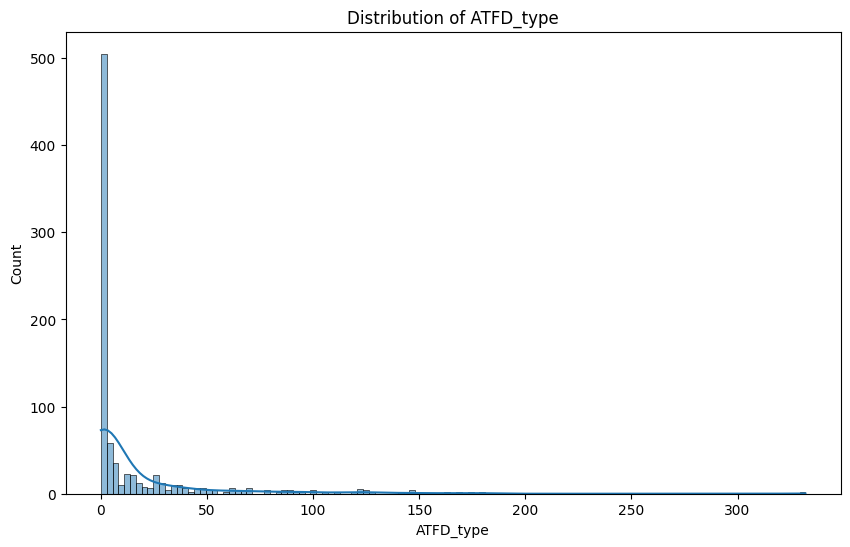

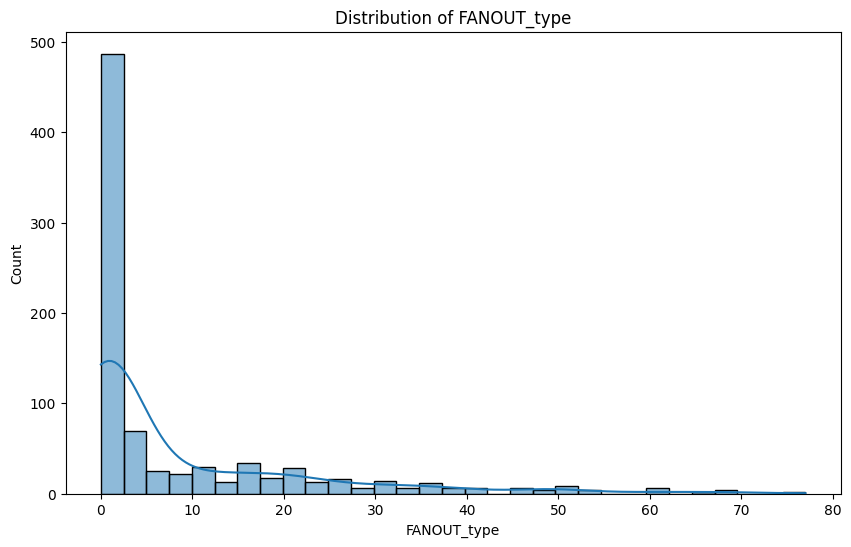

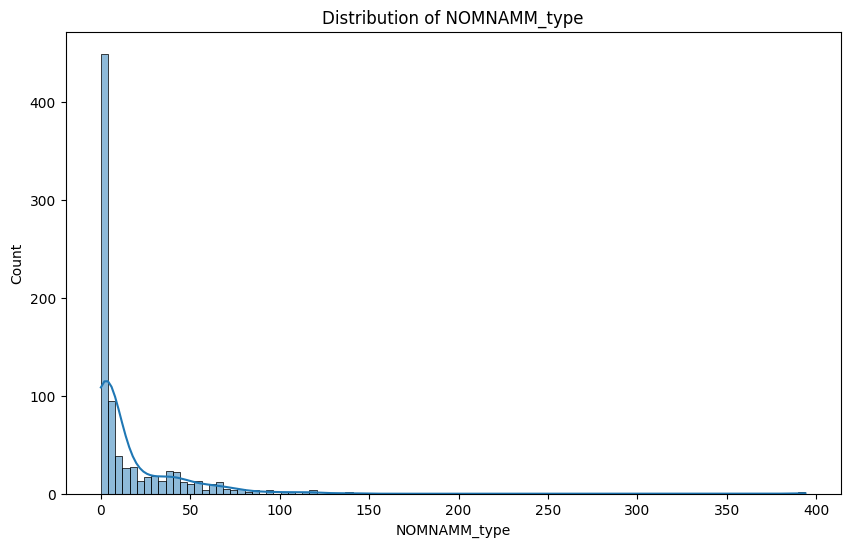

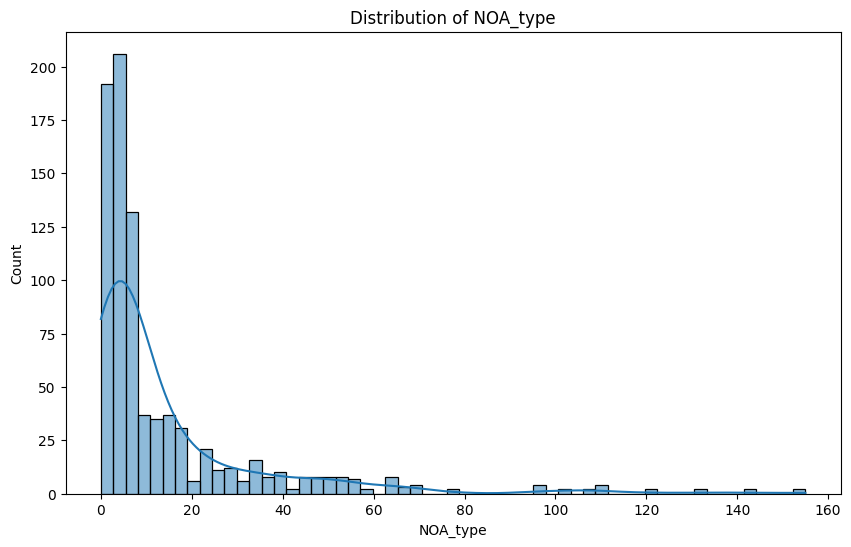

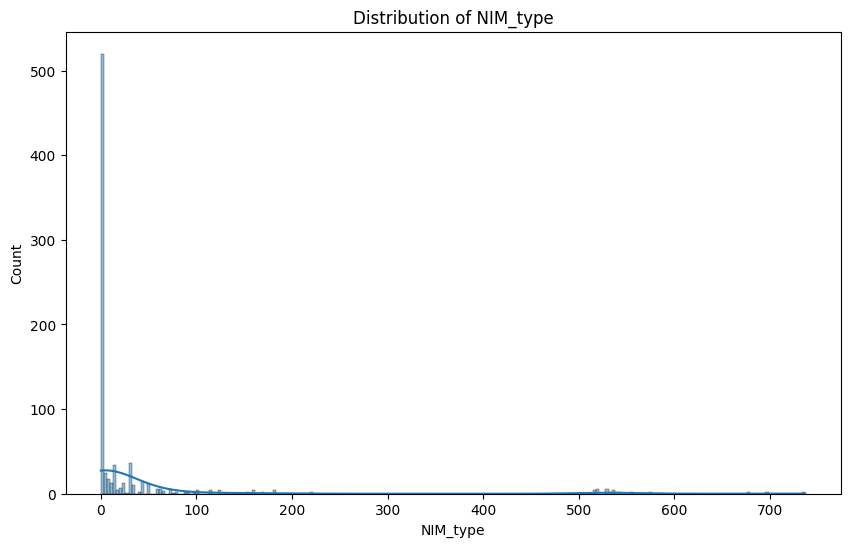

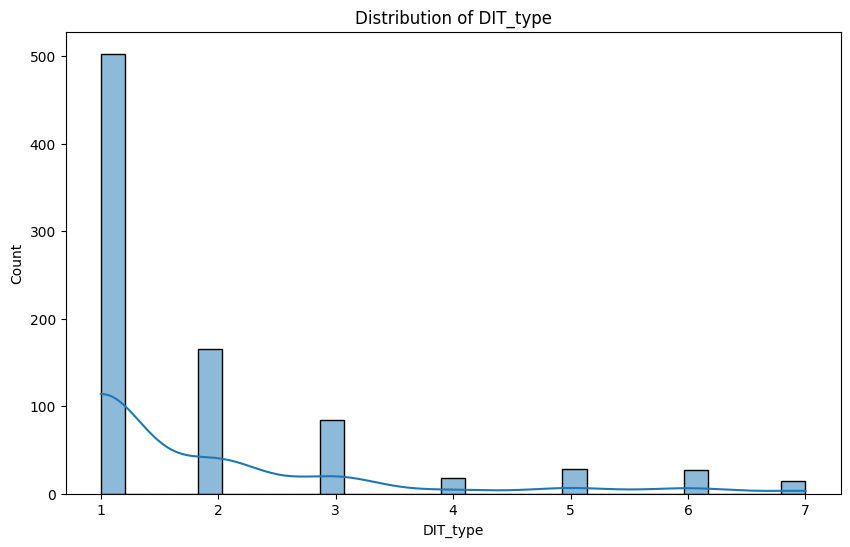

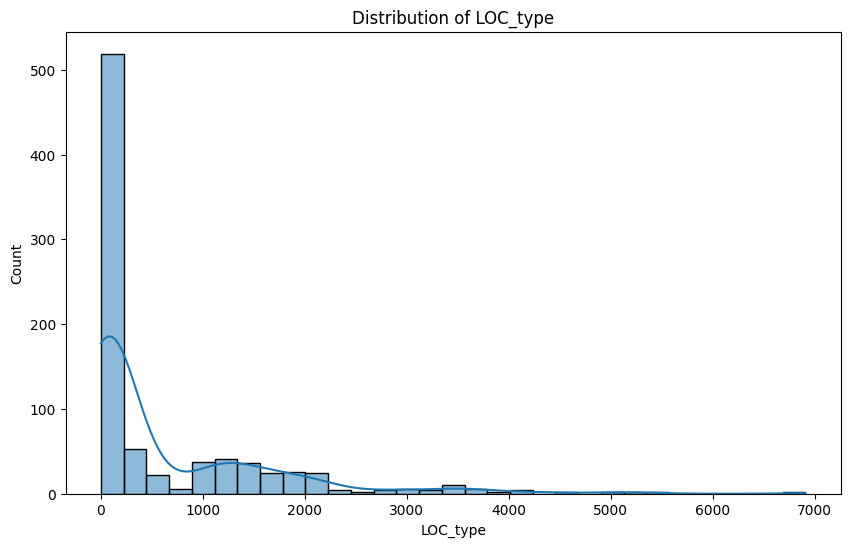

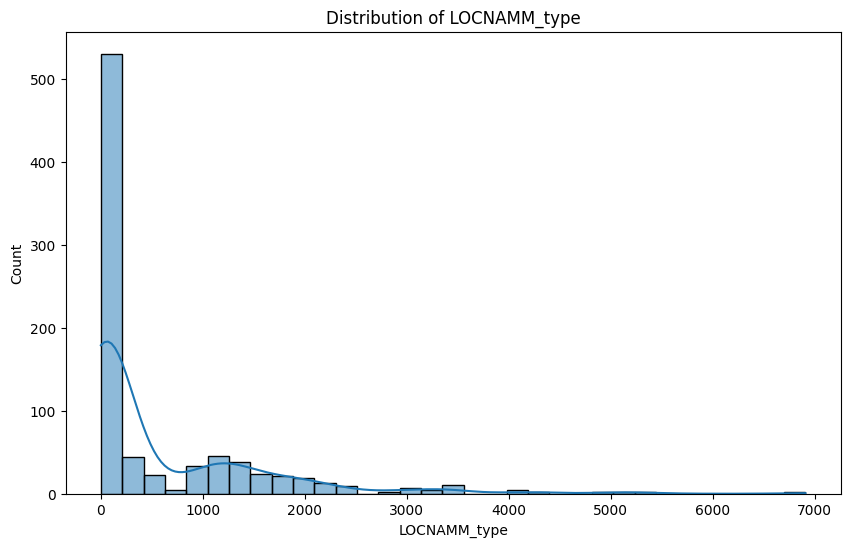

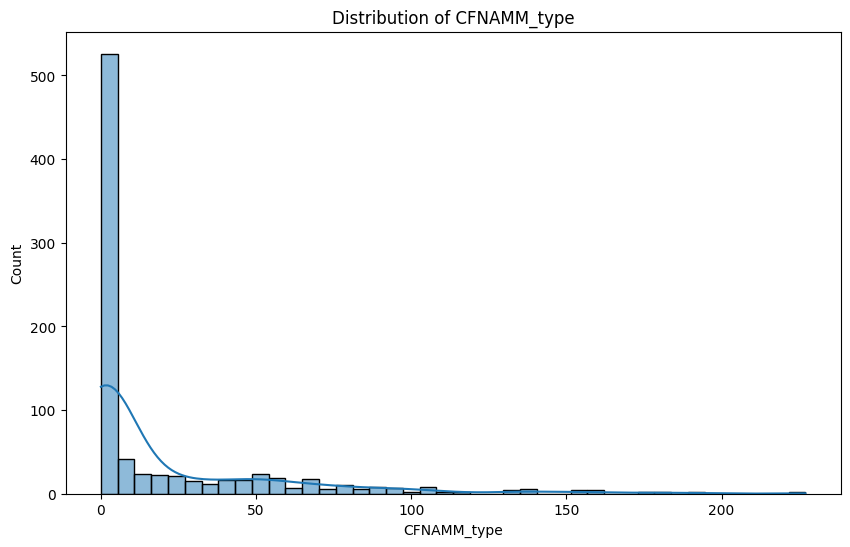

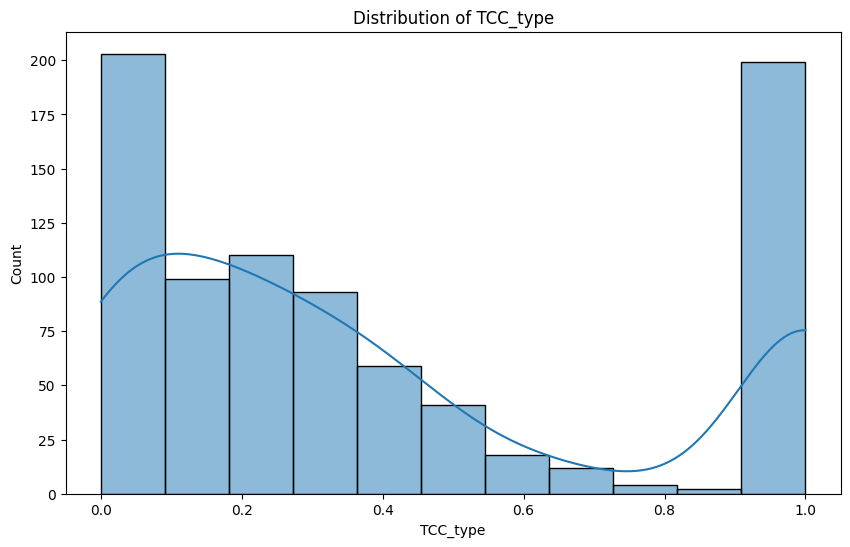

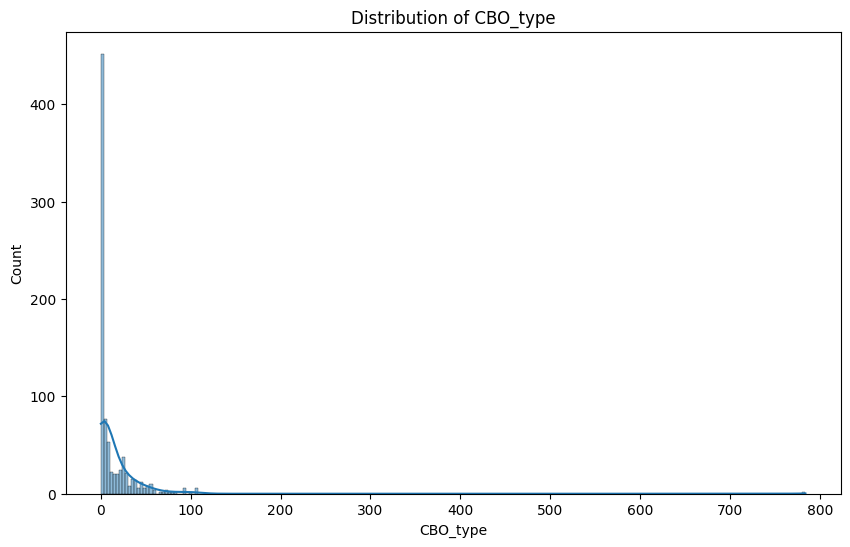

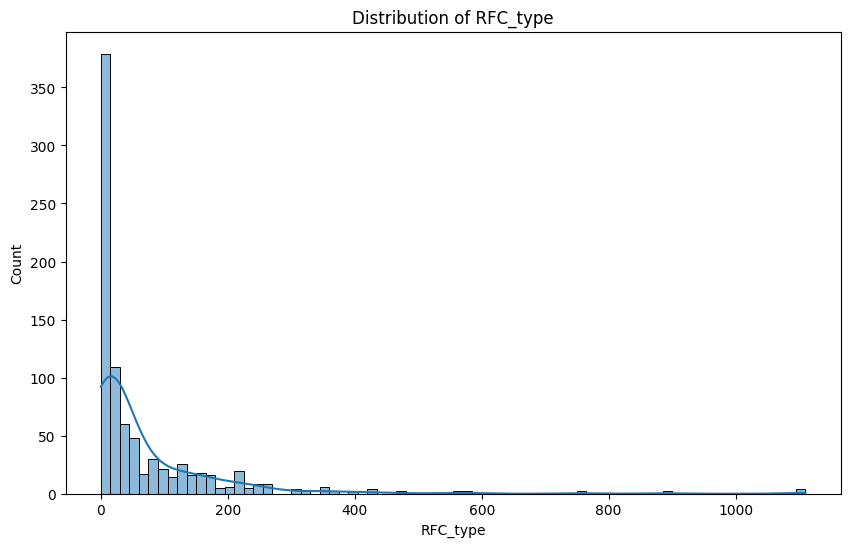

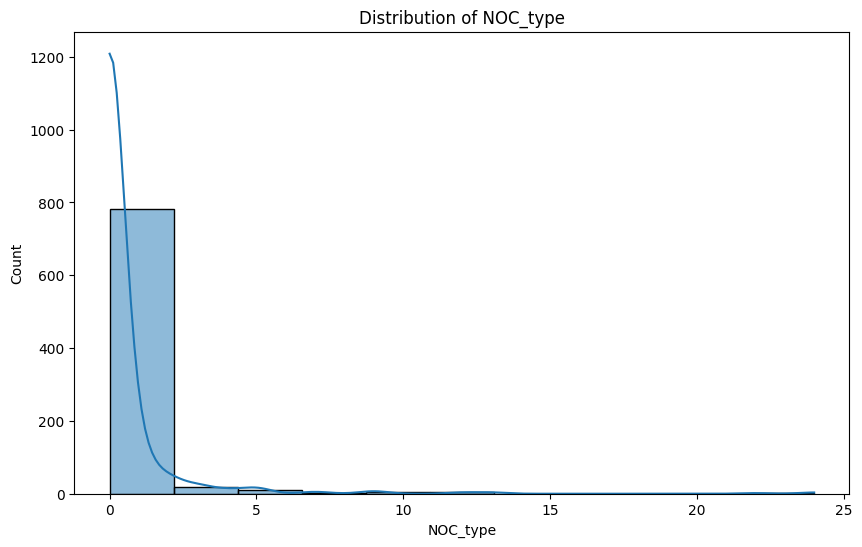

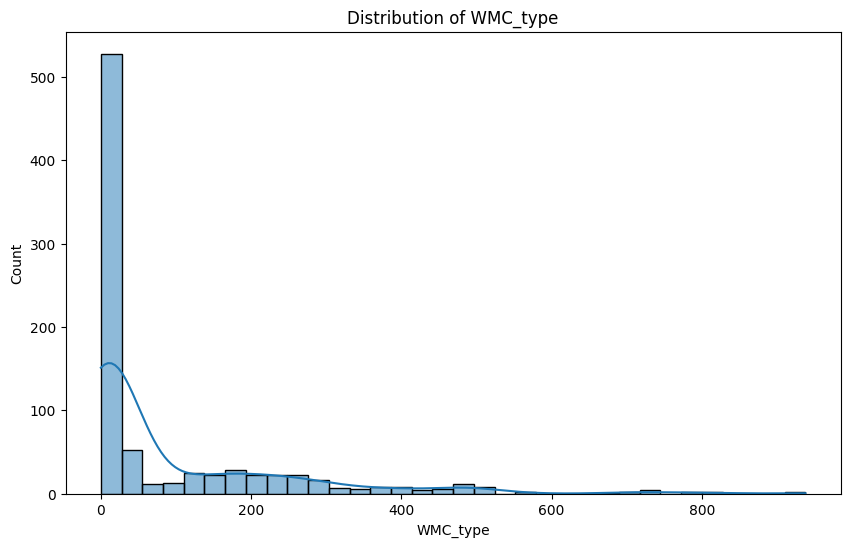

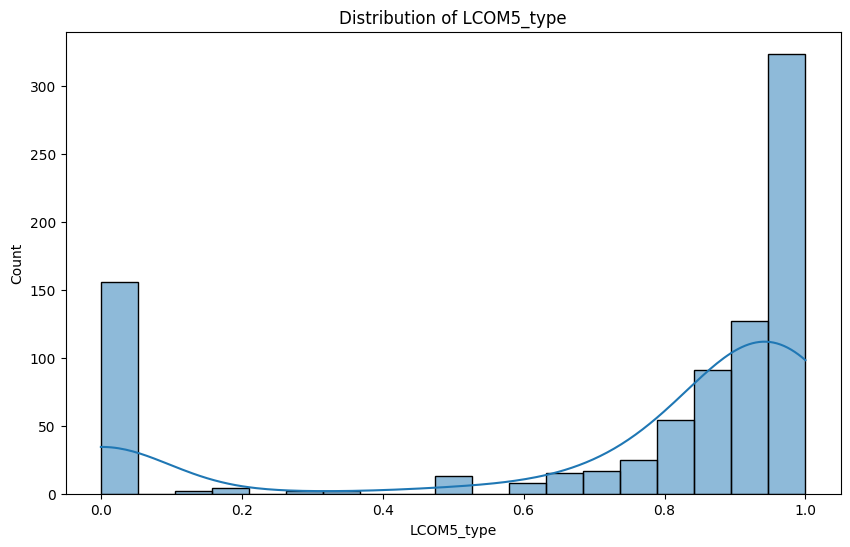

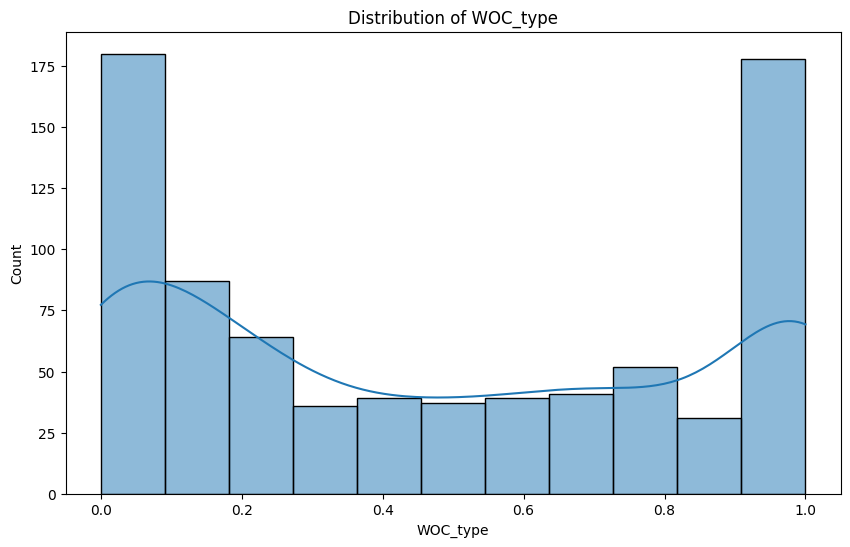

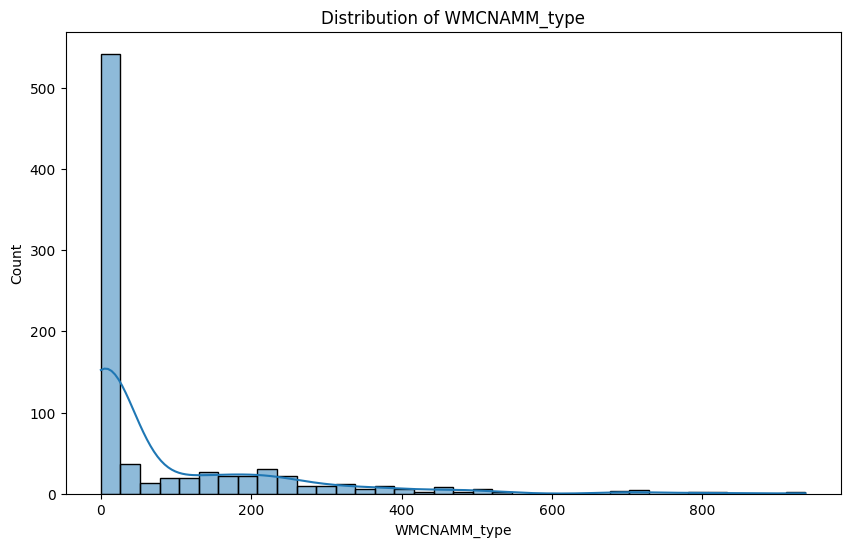

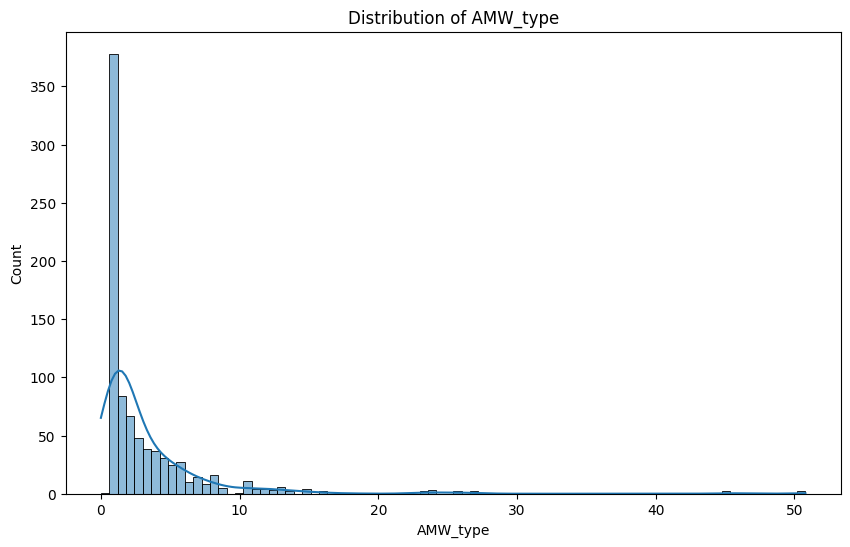

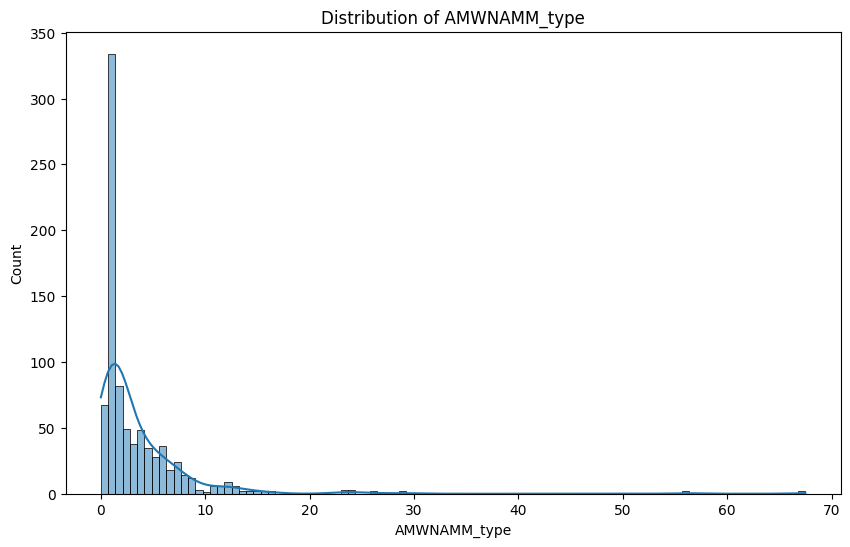

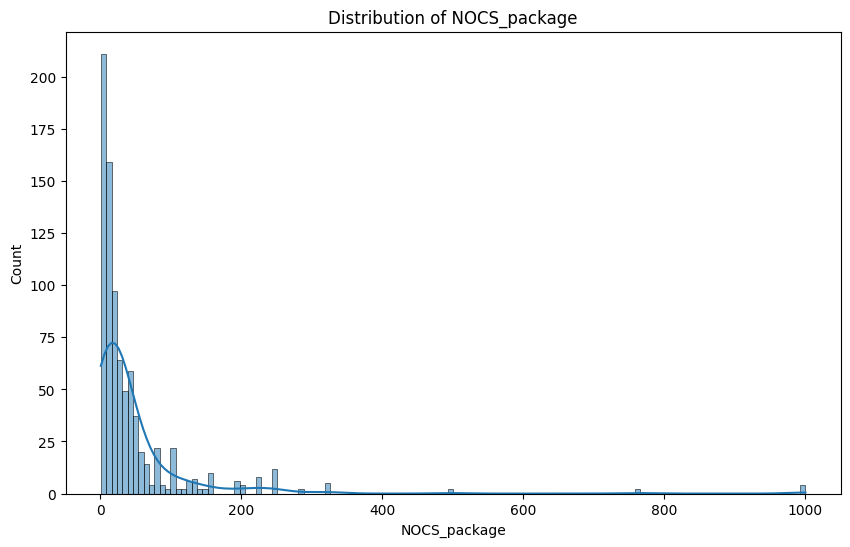

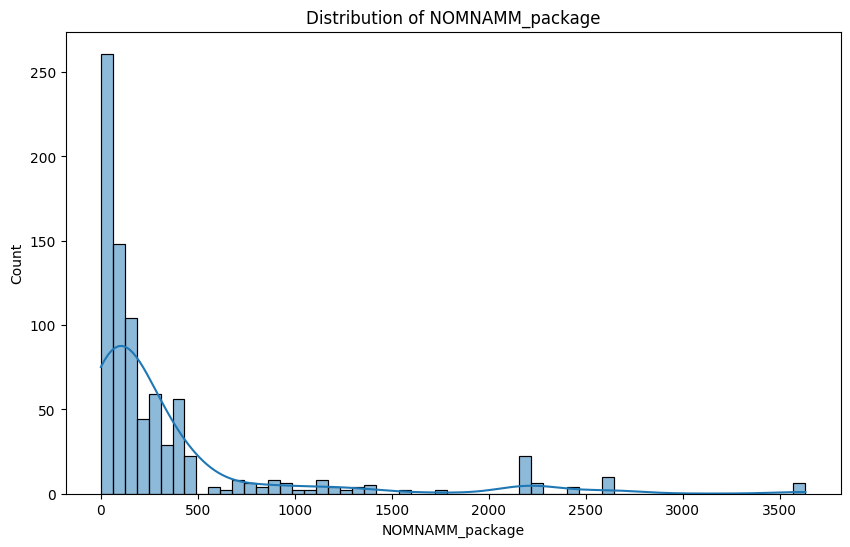

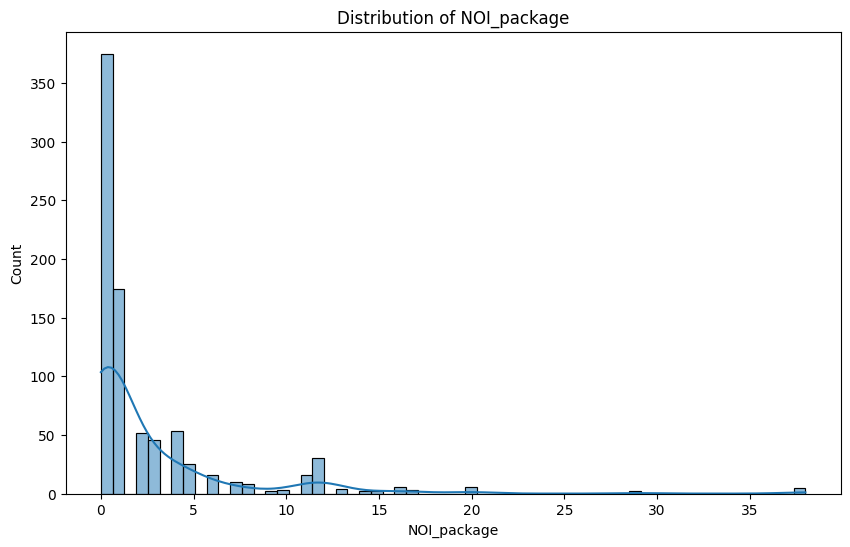

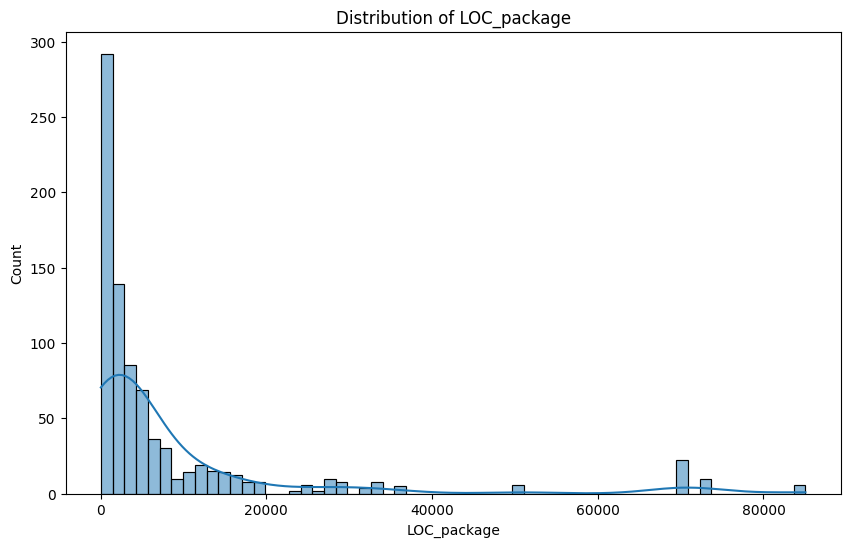

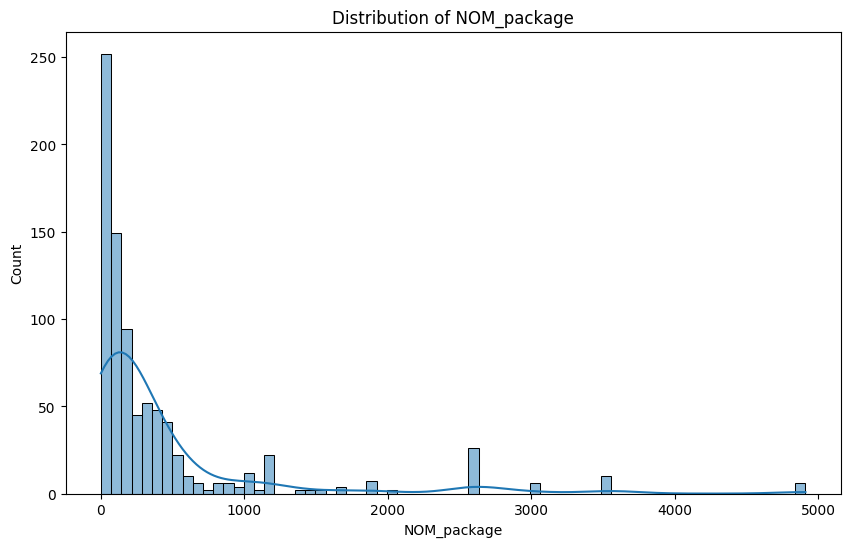

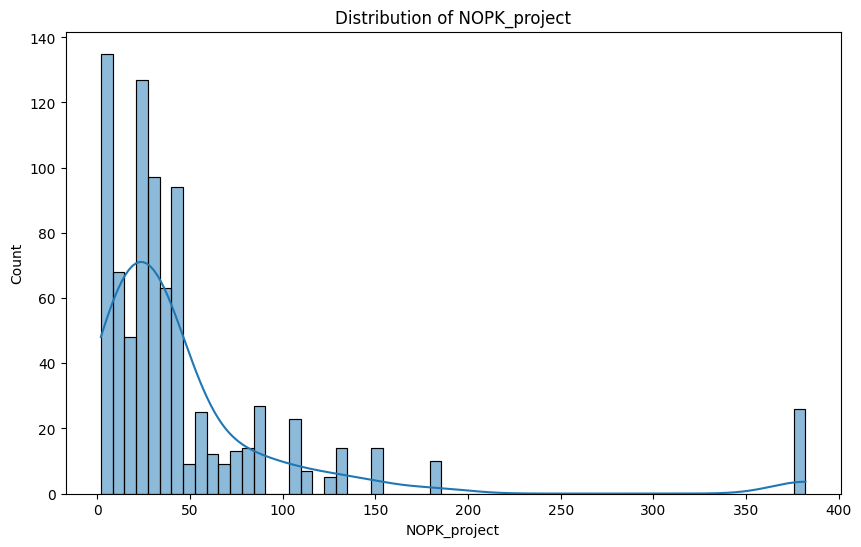

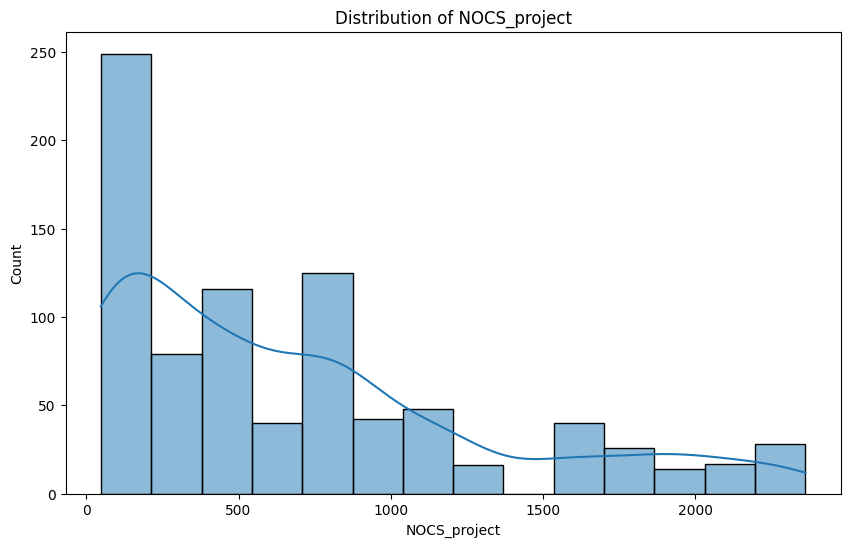

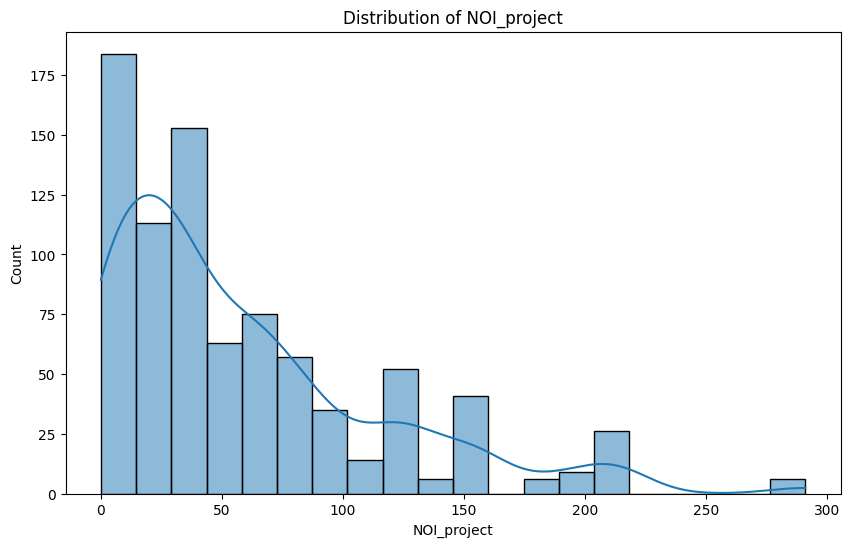

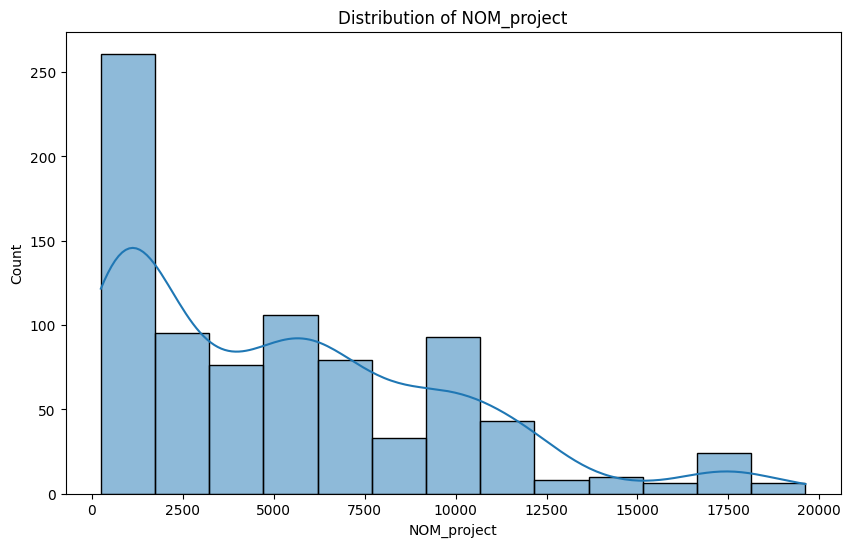

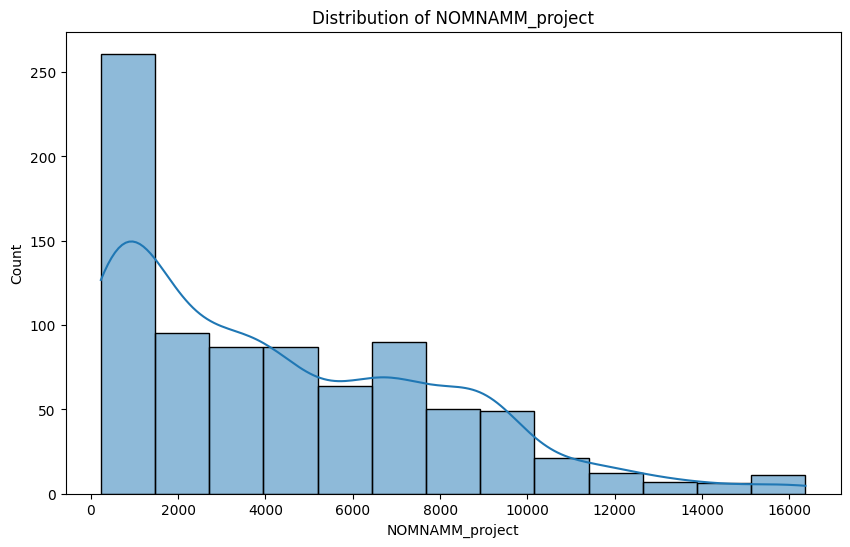

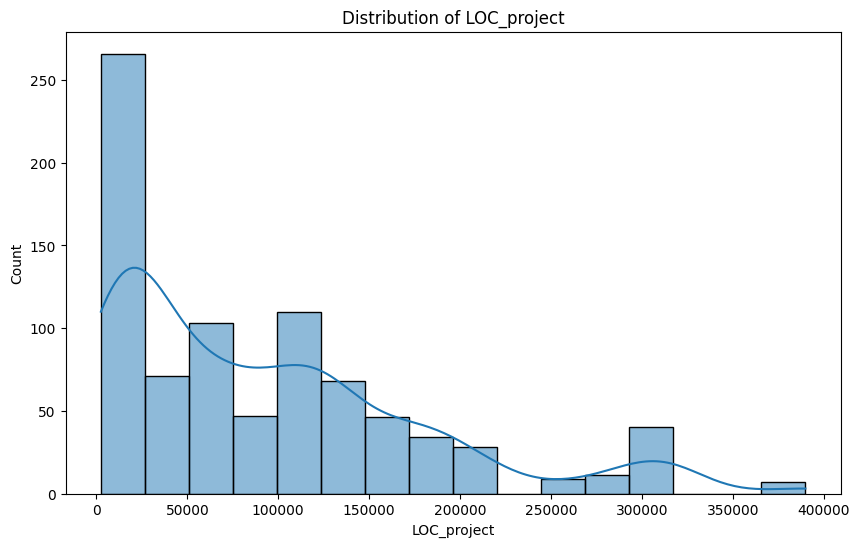

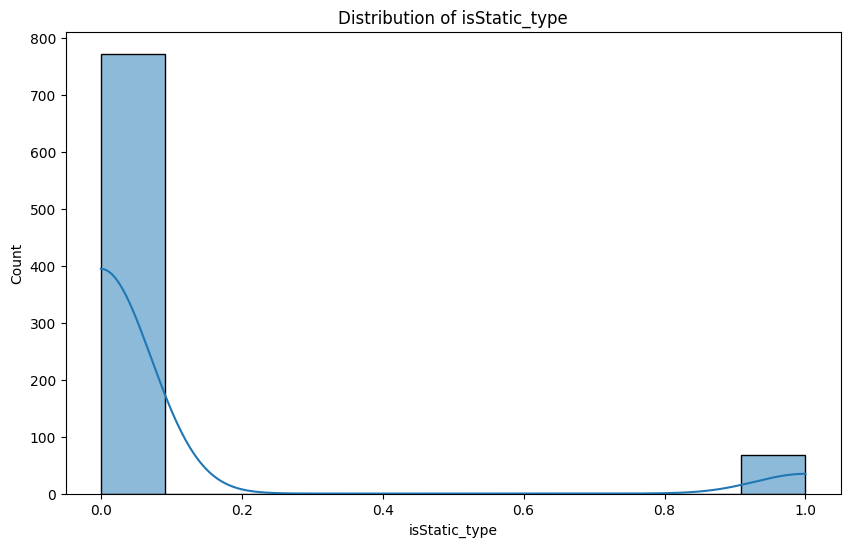

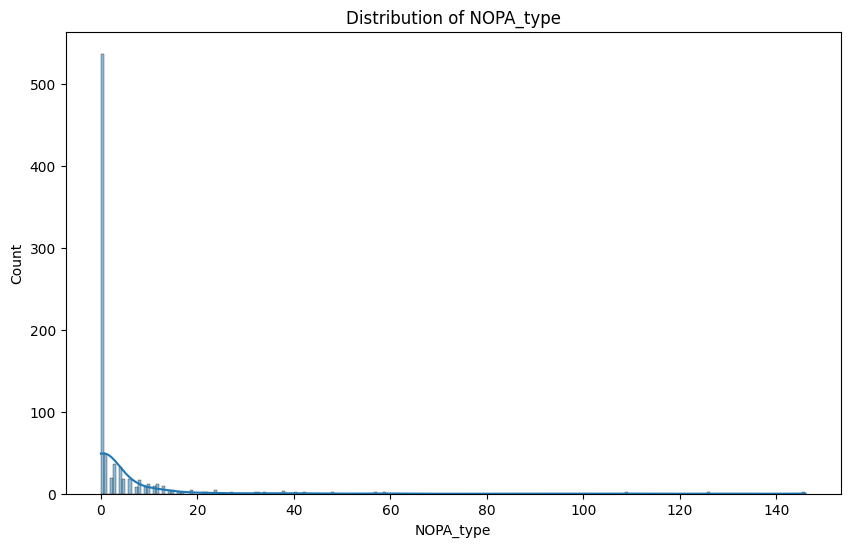

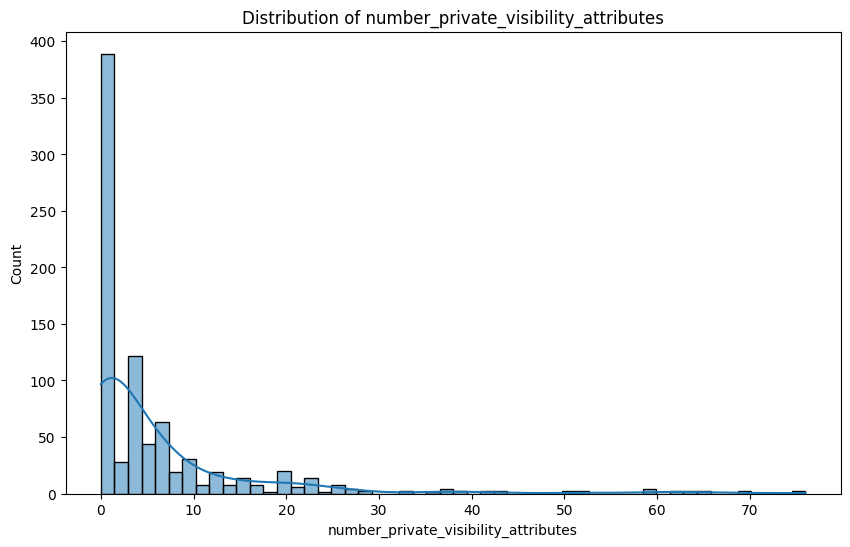

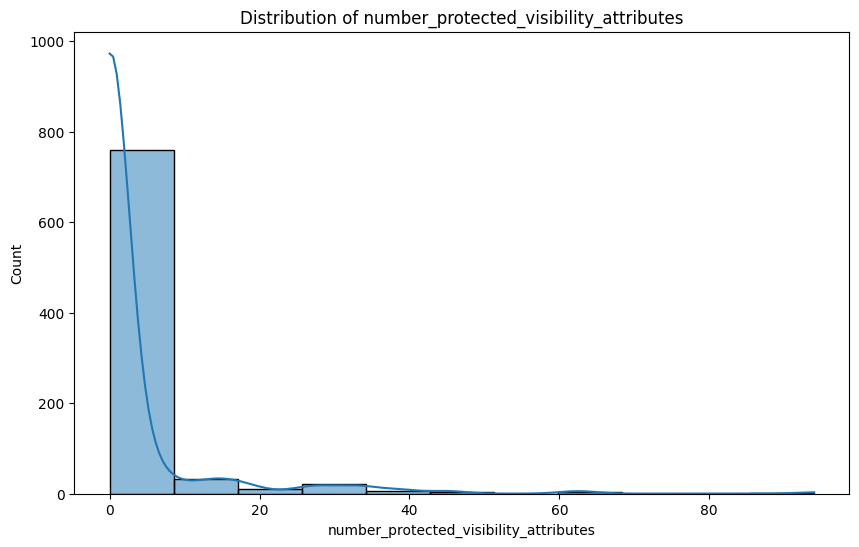

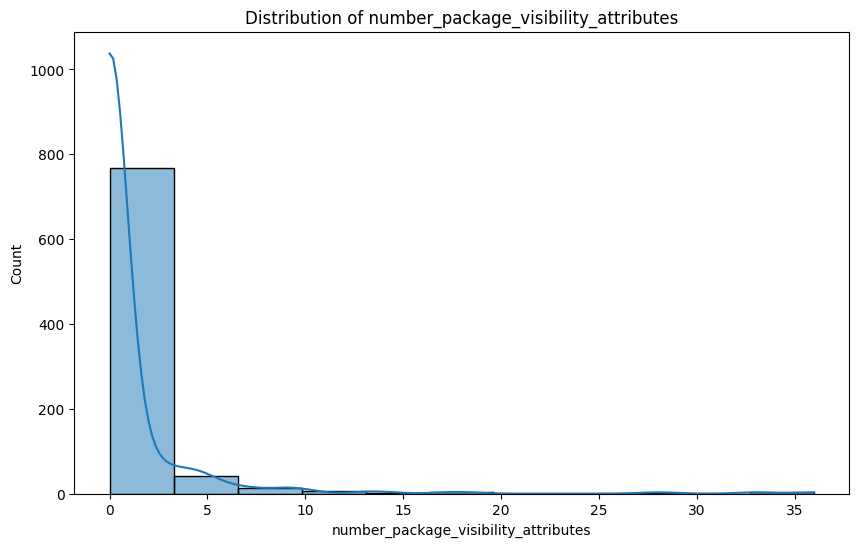

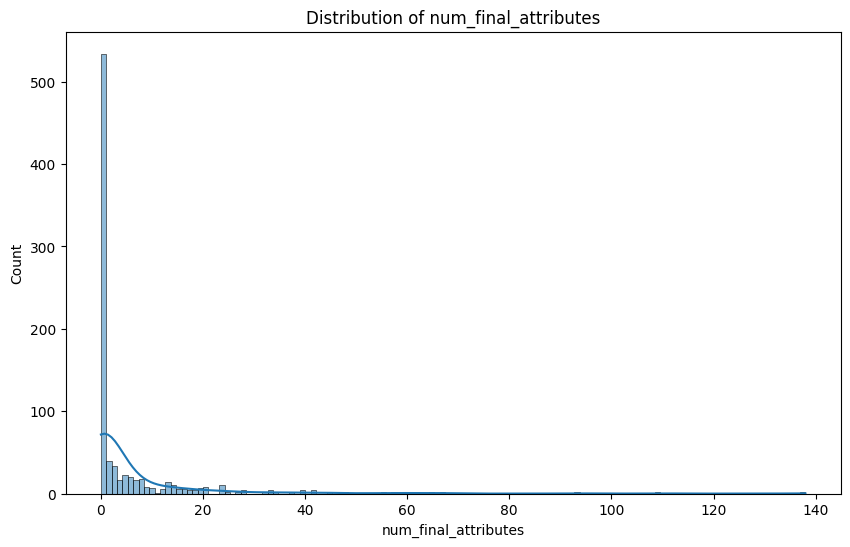

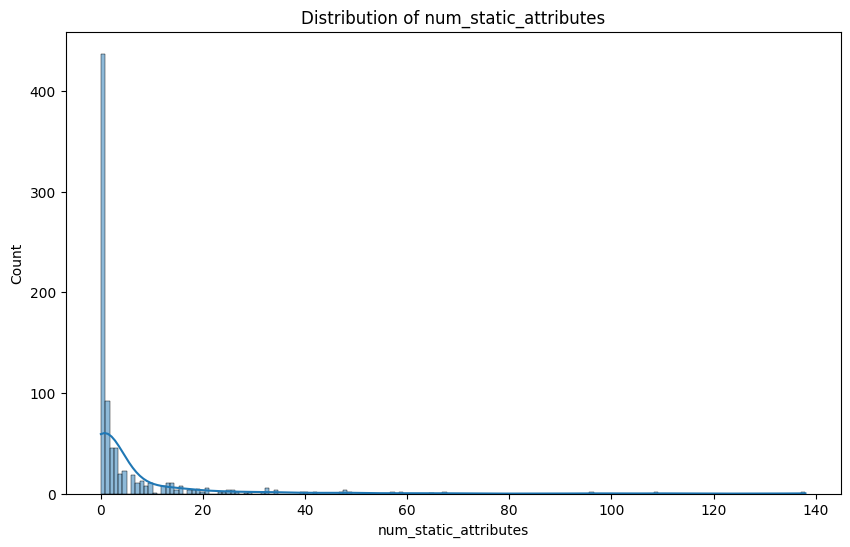

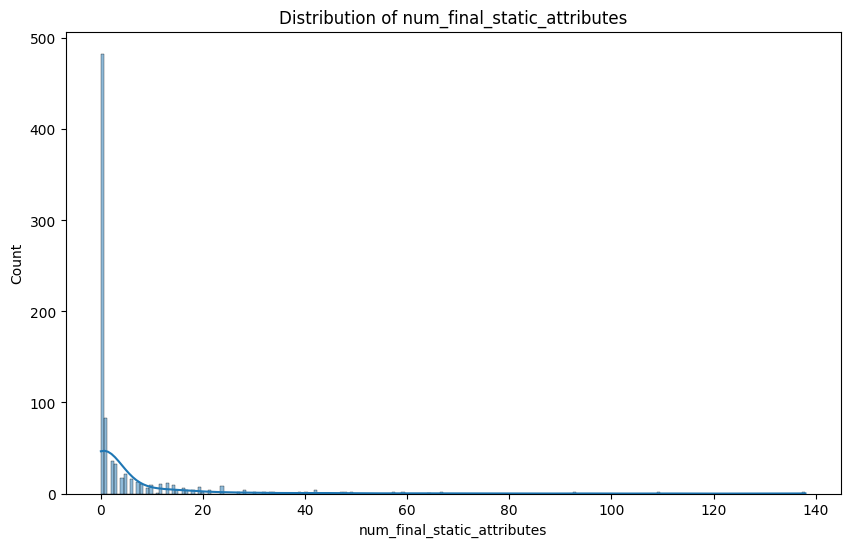

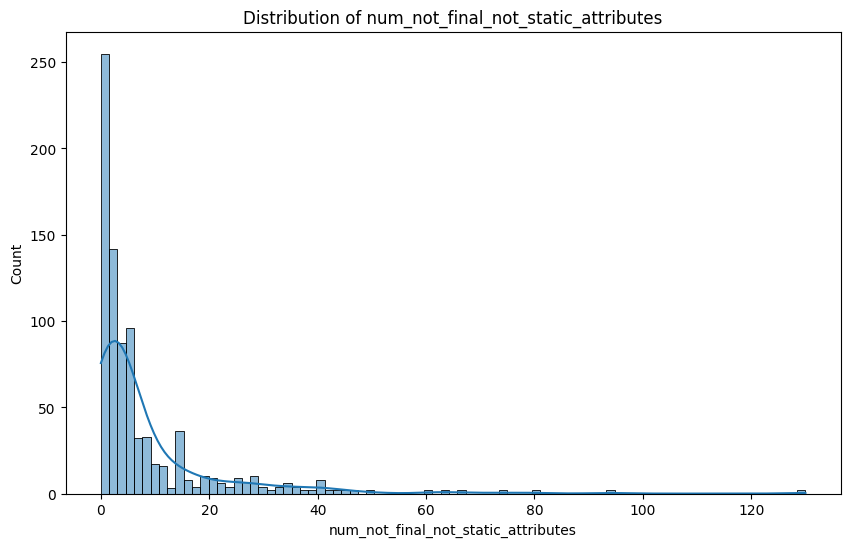

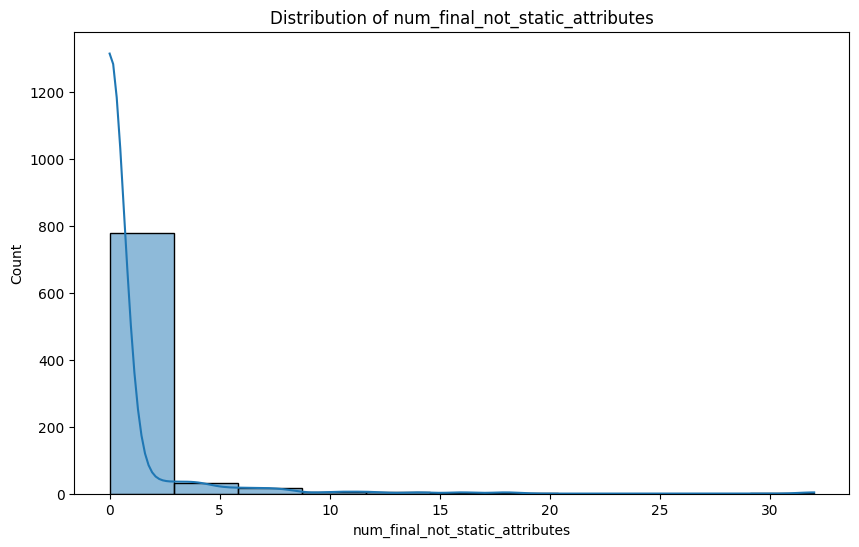

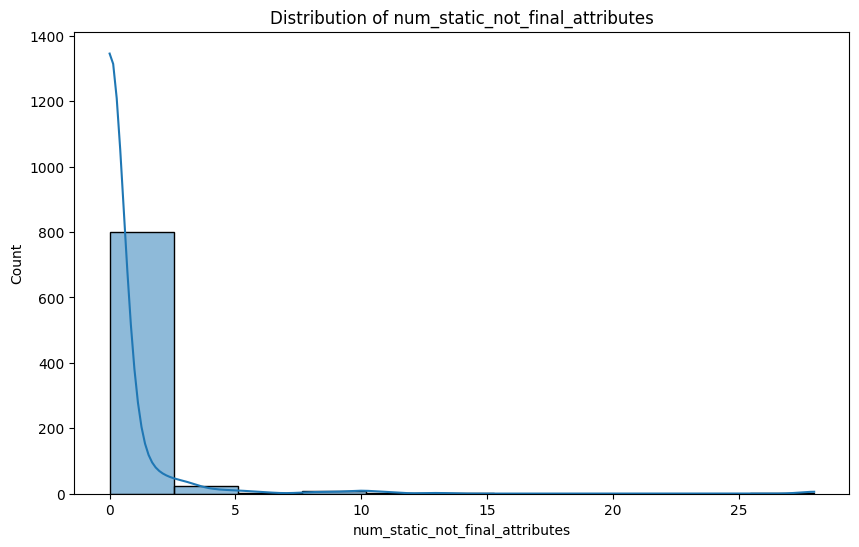

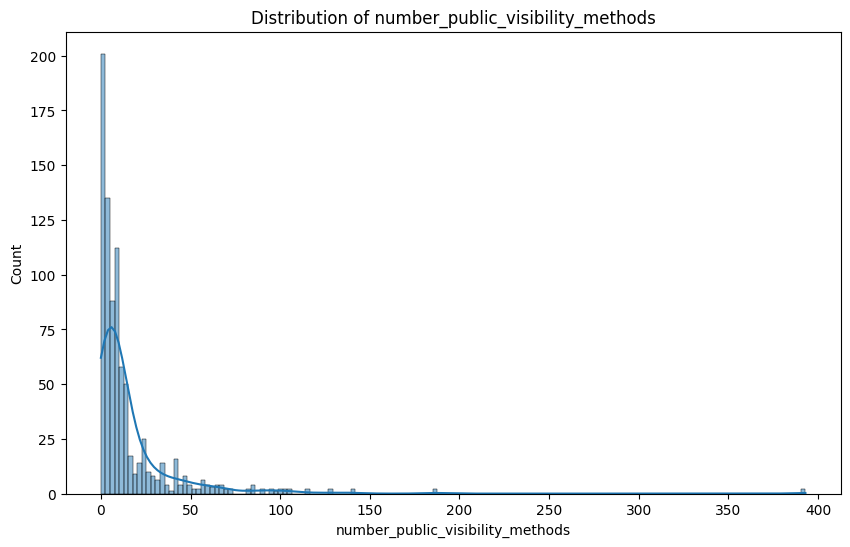

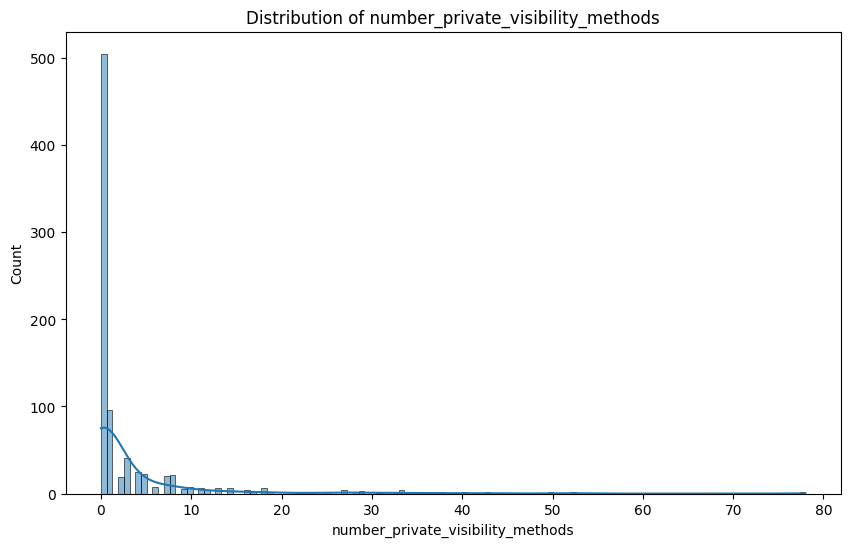

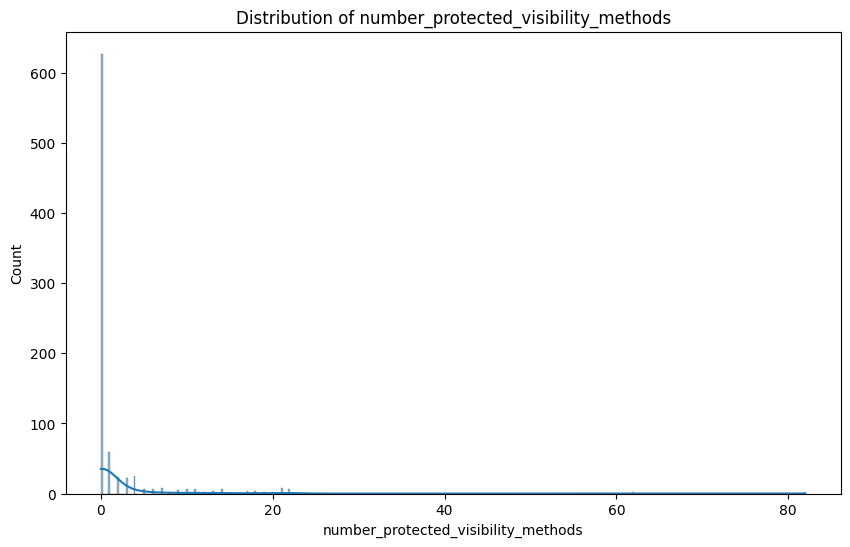

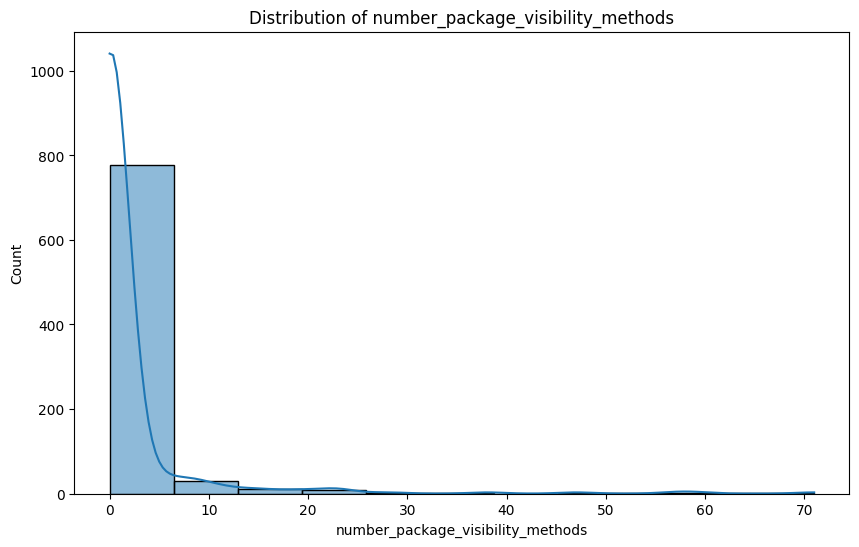

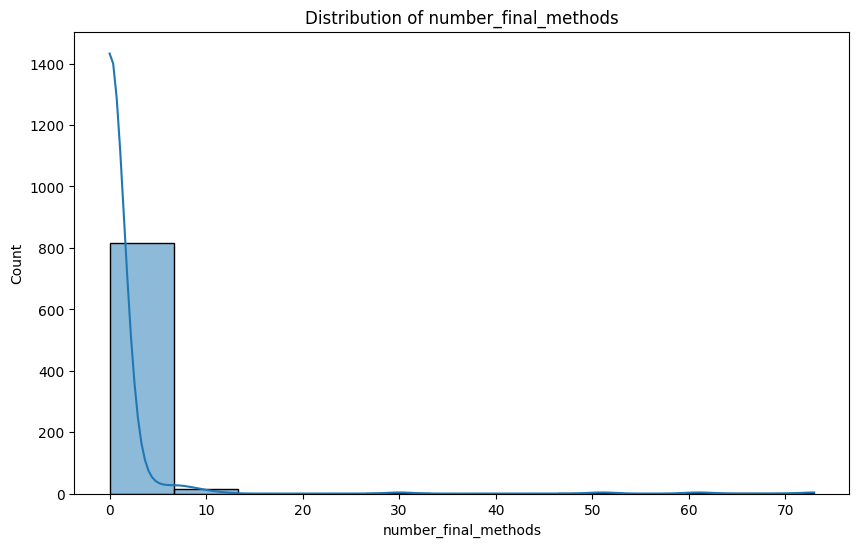

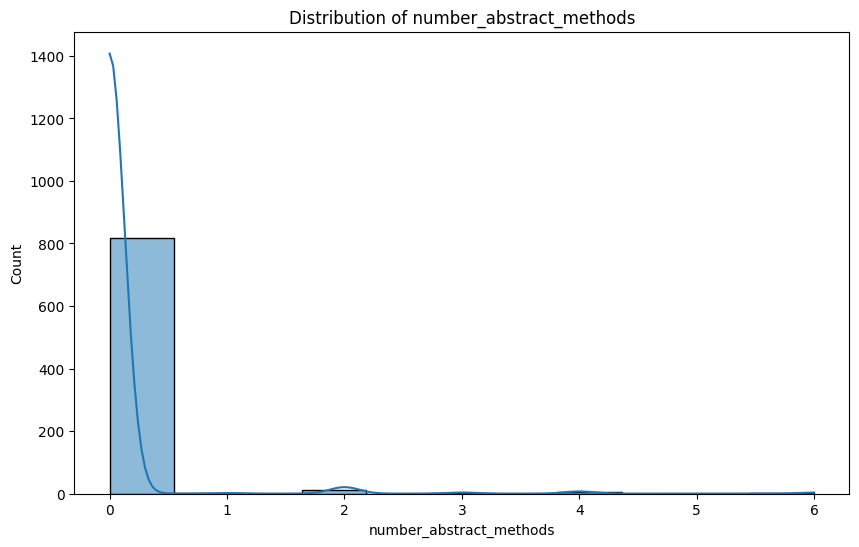

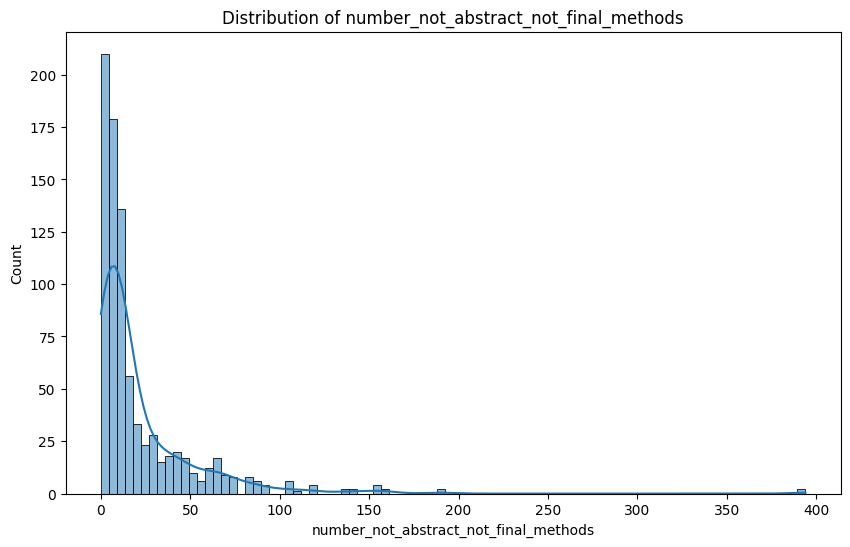

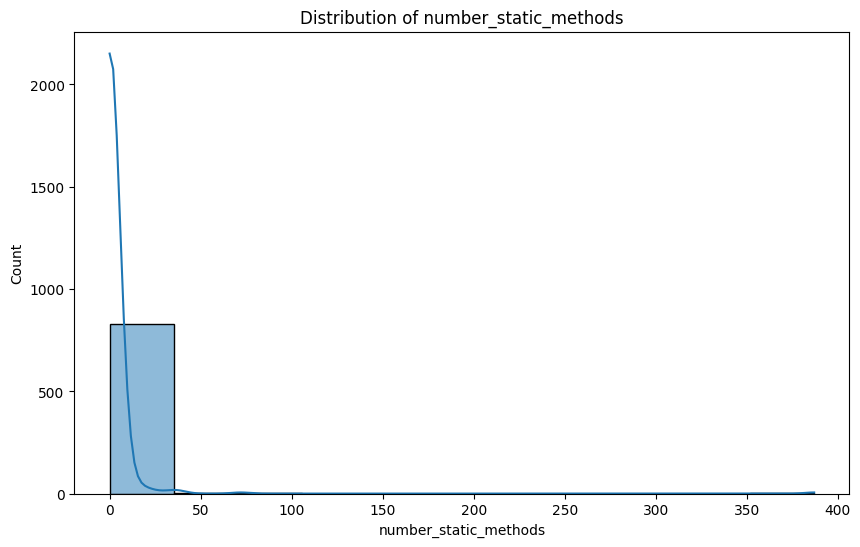

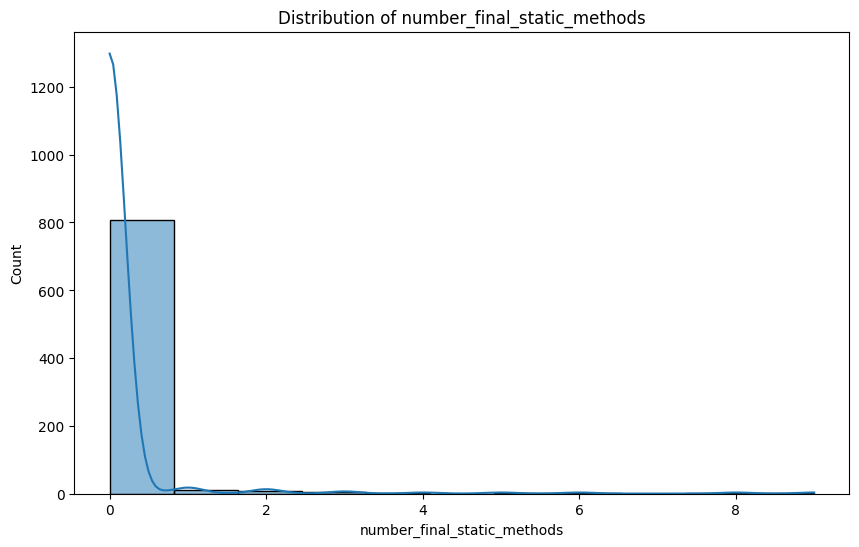

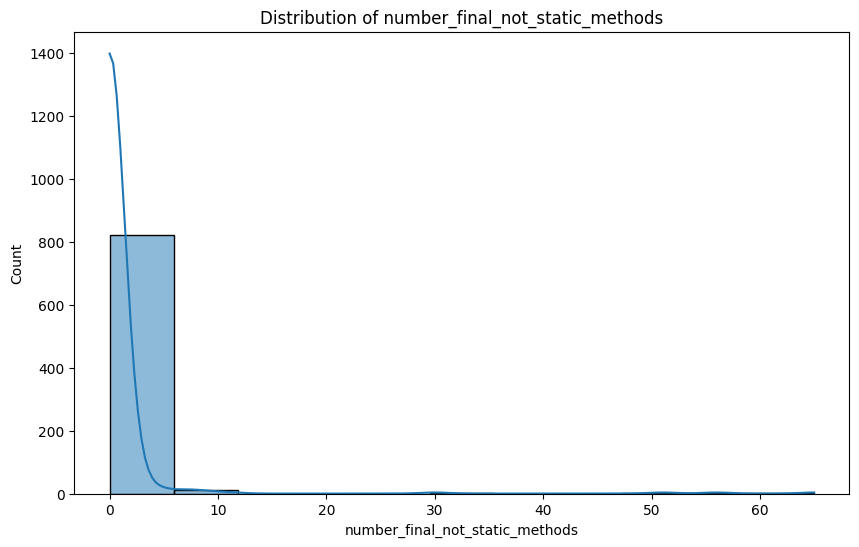

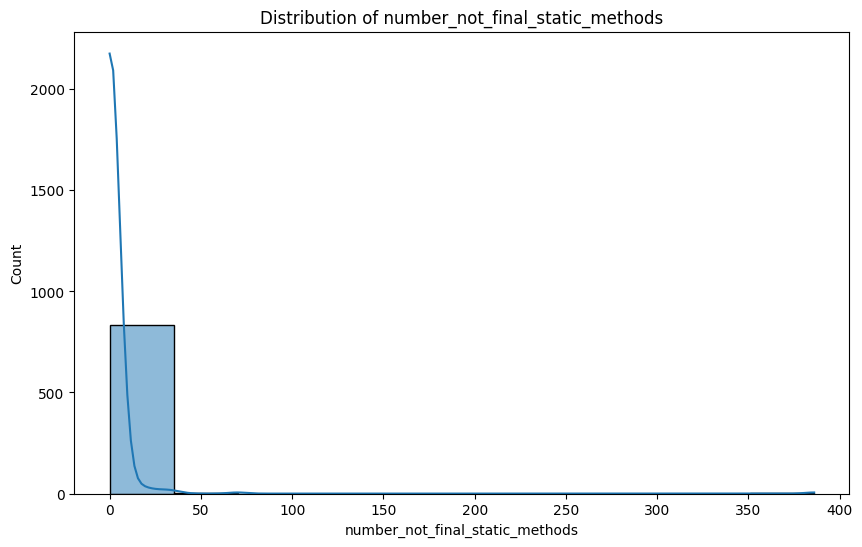

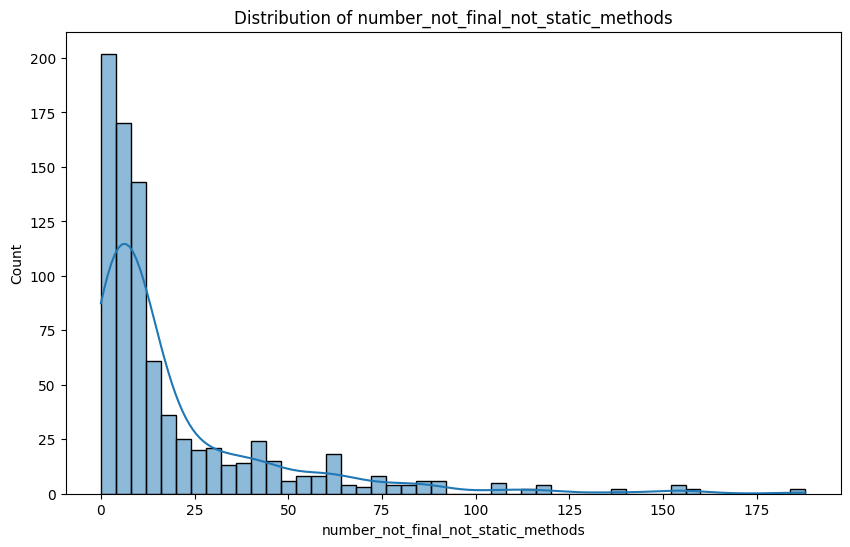

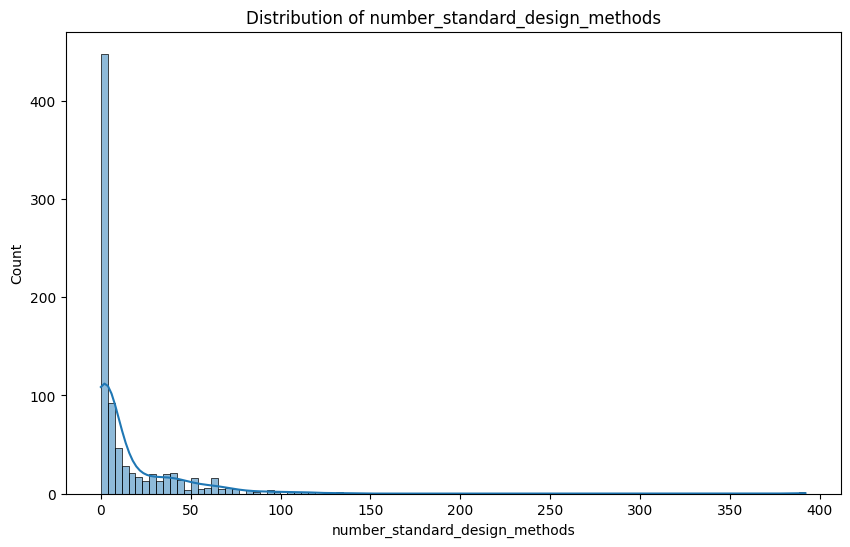

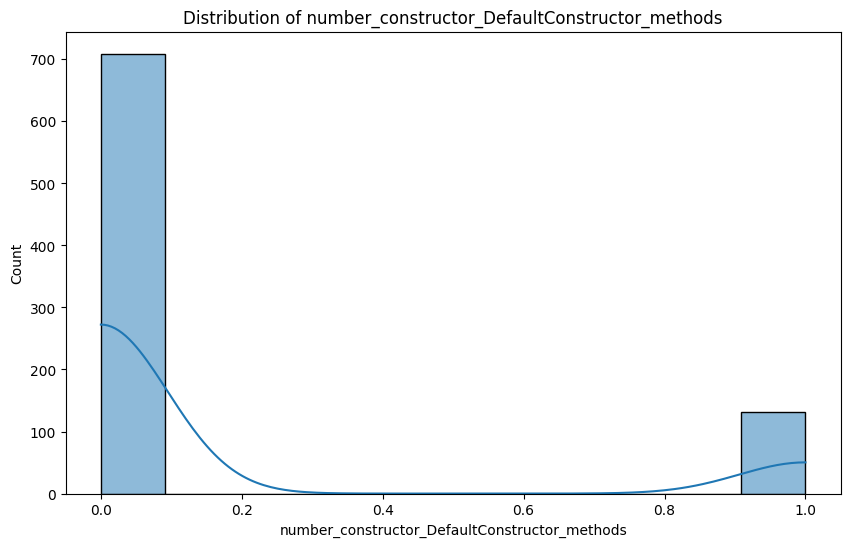

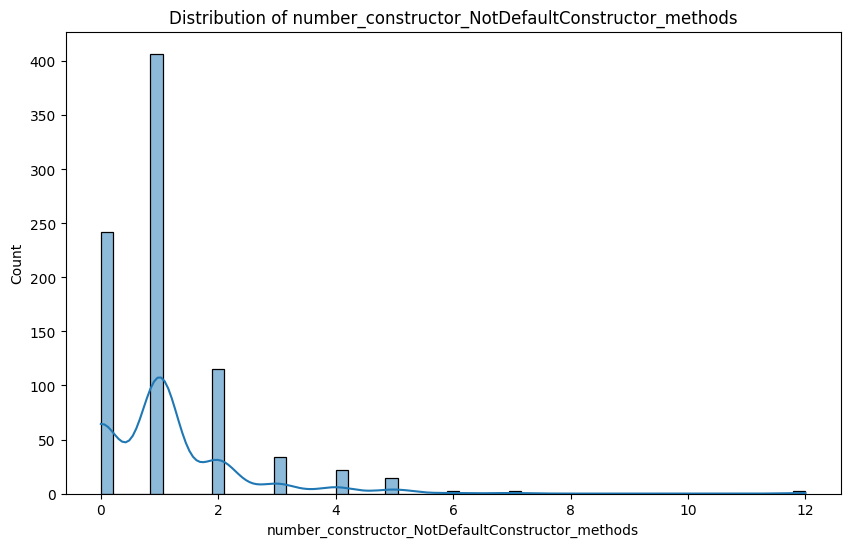


Skewness of numeric features:
 NOII_type                                            4.235463
NOAM_type                                            3.608147
NOCS_type                                            6.184876
NOM_type                                             4.589196
NMO_type                                             6.100011
                                                      ...    
number_not_final_static_methods                     18.468844
number_not_final_not_static_methods                  2.714908
number_standard_design_methods                       5.916663
number_constructor_DefaultConstructor_methods        1.899965
number_constructor_NotDefaultConstructor_methods     2.898645
Length: 61, dtype: float64


In [3]:
# Analyzing the distribution of all numeric features in the dataset

# Select numeric columns only (int and float types)
numeric_columns = data_class_df.select_dtypes(include=['float64', 'int64']).columns

# Visualize the distribution of each numeric feature
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_class_df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# Calculate the skewness of each numeric feature
skewed_features = data_class_df[numeric_columns].skew()
print("\nSkewness of numeric features:\n", skewed_features)

1. **Prevalence of Skewed Distributions**:  
   Most features exhibit a significant left skew, meaning the majority of samples have feature values concentrated in the lower range, while a few samples have much higher values. For instance, features like `NIM_type` and `NOA_type` show pronounced left-skew, where values cluster around very small numbers, and only a small number of samples have extremely high values. This skewed distribution could negatively impact machine learning algorithms that assume normality, such as linear models. To mitigate this, transformations like log transformation may be needed to reduce the influence of extreme values.

2. **Significant Differences in Scale**:  
   There are substantial differences in the numerical range across different features. For example, features like `DIT_type` and `NMO_type` have smaller value ranges, while others like `LOC_type` and `RFC_type` span much larger ranges. Such differences in scale can cause models to be overly sensitive to certain features during training, especially when no feature standardization is applied. To address this, feature standardization may be necessary to ensure all features contribute equally to the model.

3. **Bimodal Distributions**:  
   Some features, such as `LCOM5_type` and `TCC_type`, exhibit bimodal distributions, indicating the presence of two distinct groups or clusters within the data. This suggests that there may be complex relationships between features in the dataset. These types of distributions could reflect underlying differences in code styles or structures, which might warrant further investigation to better understand their impact on code quality.

4. **Subjectivity and Feature Distribution Correlation**:  
   Certain features, like `WOC_type`, display a clear bimodal pattern that could be related to differences in the perception of code smells between different reviewers. More experienced engineers may be more sensitive to subtle issues in the code (resulting in higher values), while less experienced engineers might not perceive these issues (resulting in lower values). This subjectivity could be the reason behind the bimodal distribution, supporting the idea that different groups of reviewers have varying perceptions when evaluating code quality.

# Revised Hypothesis and Analysis:

**Hypothesis:**  
Each feature's lower value corresponds to a lower likelihood of the code containing a code smell, meaning that higher values increase the probability of code smells. However, based on our analysis of the dataset, most of the data are labeled as "no code smell" (false), which suggests that the dataset predominantly consists of "healthy" or simple code.

**Problem with the Dataset Representativeness:**  
While the dataset shows that the majority of the code does not have code smells, this does not align with real-world software systems, which tend to be more complex and thus more likely to contain code smells due to their size and intricacy. In practice, large-scale systems, websites, and applications are often riddled with complexities, making code smells more common. Therefore, the dataset we are analyzing likely does **not represent the true population** of real-world software systems.

This lack of representativeness helps explain a key observation:  
The author found that **only 100 training samples** were needed to achieve **95% detection accuracy**. This may be because the dataset is heavily imbalanced, with the majority of the code snippets labeled as "no code smell" (false). The model can easily achieve high accuracy by learning to predict "false" (no code smell) for most cases, as **83% of the dataset is labeled as false**. Thus, even a simplistic model that always predicts "false" can achieve a high accuracy, purely based on this class imbalance.

### Supporting Evidence:

1. **Skewed Class Distribution:**  
   Since 83% of the dataset is labeled as "no code smell," a model that predominantly predicts "false" will achieve a high accuracy (around 83%) without actually learning the nuances of what constitutes code smells. This explains the high accuracy with relatively few training samples, but it also exposes the model’s potential **lack of generalization** to real-world, more complex systems where code smells are likely more prevalent.

2. **Real-World Complexity:**  
   In real-world software, systems are often large, and the likelihood of encountering code smells is higher due to scaling, technical debt, and evolving codebases. If the dataset does not capture this complexity, it will not accurately reflect the challenges of detecting code smells in practice. Therefore, while the model may perform well on this dataset, its ability to generalize to more complex, real-world scenarios is questionable.

### Conclusion:
The dataset’s imbalance and lack of representation of real-world complexity suggest that the high accuracy achieved with minimal training samples may not be indicative of the model’s true performance in practical scenarios. In essence, the model might simply be capitalizing on the fact that the majority of samples in the dataset are "code smell-free." This imbalance skews the accuracy metric, making it less meaningful in the context of detecting actual code smells in complex software systems.

# Key issues
1. **Imbalanced Dataset**:  
   The dataset used in the study is imbalanced, with a large majority of samples labeled as "no code smell" (false). This raises concerns that the dataset may not represent the true population of real-world software systems, which are often more complex and likely to contain code smells. The skewed distribution of the data could lead to an over-reliance on predicting the majority class, which might not reflect the challenges of detecting code smells in complex, real-world systems.

2. **Overemphasis on Accuracy**:  
   The paper places too much emphasis on accuracy as a performance metric. In an imbalanced dataset, accuracy can be misleading, as the model could achieve high accuracy simply by predicting the majority class ("no code smell") most of the time. This means that accuracy alone is not a reliable measure of the model’s true performance in detecting code smells. In such cases, other metrics like precision, recall, and F1-score are more informative, especially when evaluating the model’s ability to identify the minority class (code smells).

### In Summary:
The two key issues highlight that:
- **The dataset’s imbalance may lead to a biased model** that performs well on the majority class (healthy code) but struggles to detect code smells in the minority class.
- **Accuracy is not sufficient** to evaluate the model’s effectiveness in an imbalanced dataset. More robust metrics like precision, recall, and F1-score should be used to properly assess the model's ability to detect code smells, especially in real-world, complex systems where code smells are more likely to occur.

This suggests that the conclusions drawn in the paper may be overly optimistic, and the performance of the model might not generalize well to real-world software systems with a more balanced or complex distribution of code smells.

# This code trains and evaluates three models (KNN, Logistic Regression, and Random Forest) on a dataset, then compares their Precision, Recall, and F1-Score using bar charts.


KNN - Evaluation Results:
Accuracy: 0.74
Precision: 0.20
Recall: 0.09
F1-Score: 0.13
ROC-AUC: 0.59
Balanced Accuracy: 0.50


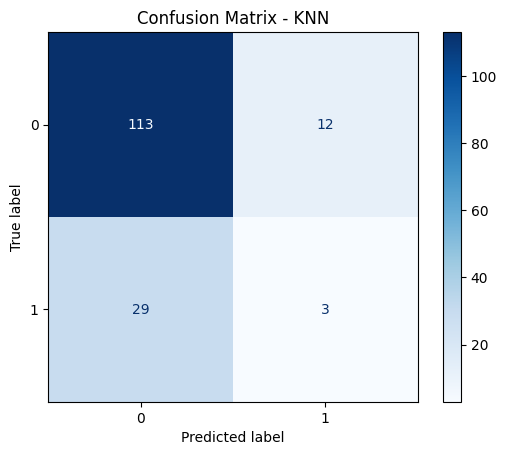

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - Evaluation Results:
Accuracy: 0.83
Precision: 0.65
Recall: 0.41
F1-Score: 0.50
ROC-AUC: 0.83
Balanced Accuracy: 0.68


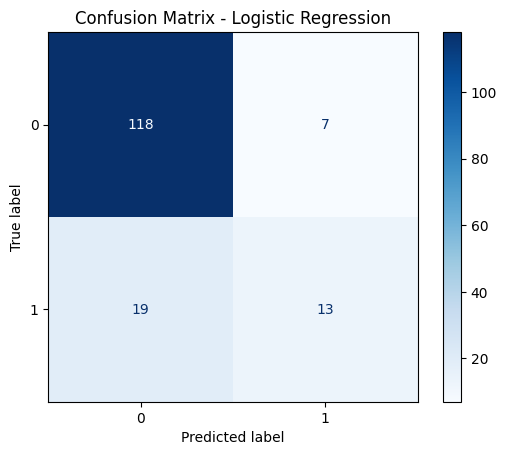


Random Forest - Evaluation Results:
Accuracy: 0.68
Precision: 0.15
Recall: 0.12
F1-Score: 0.14
ROC-AUC: 0.81
Balanced Accuracy: 0.47


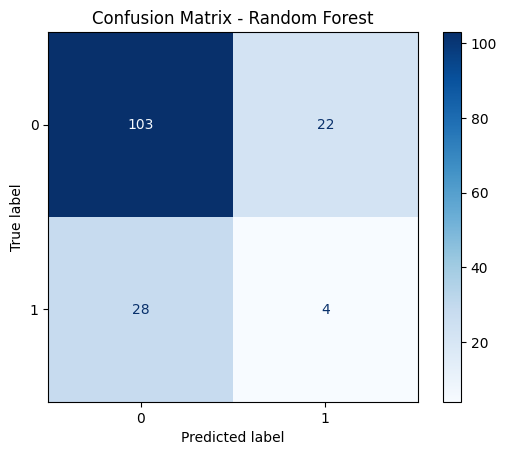

<ipython-input-4-4b70633d4aac>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=plot_data[metric], palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

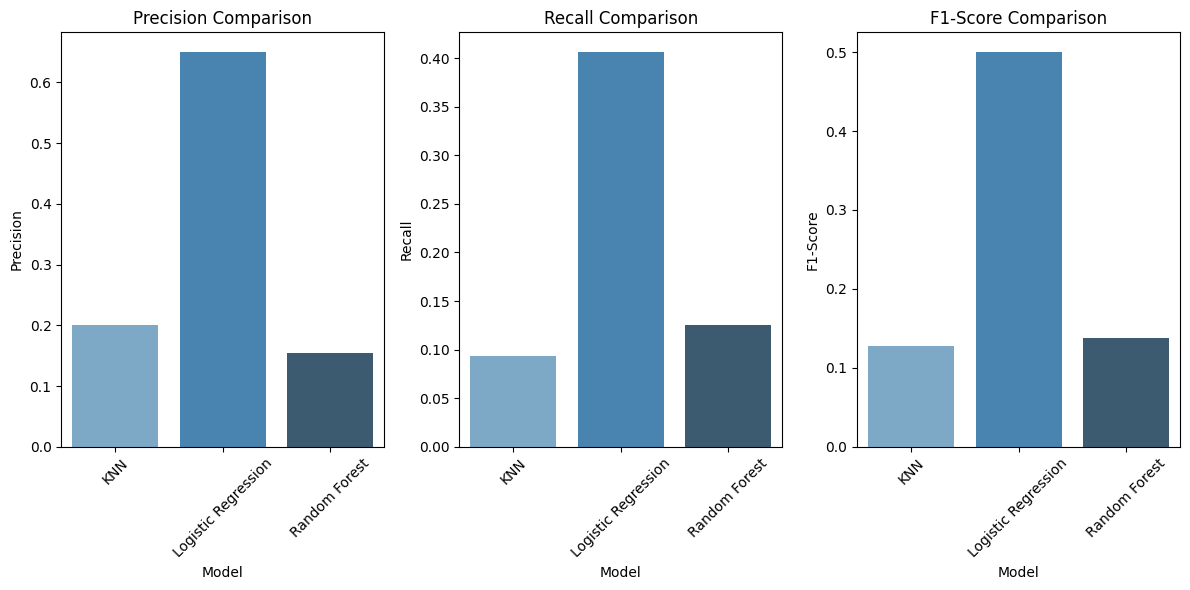

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate model performance
def evaluate_model(y_test, y_pred, y_prob, method_name):
    print(f"\n{method_name} - Evaluation Results:")

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print(f"Balanced Accuracy: {balanced_acc:.2f}")

    # Generate confusion matrix and display it
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()

    return precision, recall, f1

# Separate features and target labels
X = data_class_df.drop(columns=['is_data_class'])  # Features
y = data_class_df['is_data_class'].apply(lambda x: 1 if x == b'true' else 0)  # Convert labels to 0 and 1

# Drop all rows with missing values
X_dropna = X.dropna()
y_dropna = y[X_dropna.index]  # Ensure corresponding labels are consistent

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.2, random_state=42)

# Dictionary to store the performance results of each model
model_results = {
    'KNN': {},
    'Logistic Regression': {},
    'Random Forest': {}
}

### 1. KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate the KNN model
precision_knn, recall_knn, f1_knn = evaluate_model(y_test, y_pred_knn, y_prob_knn, "KNN")
model_results['KNN'] = {'Precision': precision_knn, 'Recall': recall_knn, 'F1-Score': f1_knn}

### 2. Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate the Logistic Regression model
precision_lr, recall_lr, f1_lr = evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
model_results['Logistic Regression'] = {'Precision': precision_lr, 'Recall': recall_lr, 'F1-Score': f1_lr}

### 3. Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
model_results['Random Forest'] = {'Precision': precision_rf, 'Recall': recall_rf, 'F1-Score': f1_rf}

# Visualize the comparison of Precision, Recall, and F1-Score for each model
metrics = ['Precision', 'Recall', 'F1-Score']
model_names = list(model_results.keys())

# Prepare data for plotting
plot_data = {metric: [model_results[model][metric] for model in model_names] for metric in metrics}

# Plot bar charts for comparison
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=model_names, y=plot_data[metric], palette='Blues_d')
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 1. **Dataset: Evidence from the Results Obtained When Analyzing the Datasets**
#### a. **Bias in the Dataset**
- **Class Imbalance**: A significant class imbalance was identified during the analysis. The majority class (code snippets without code smell) greatly outnumbers the minority class (code snippets with code smell). This imbalance causes the model to focus heavily on the majority class, often ignoring the minority class, which negatively impacts metrics like precision, recall, and F1-score.

  **Evidence**:
  - Experiment results show that models like KNN and Random Forest perform poorly in terms of precision and recall, especially for the minority class. Logistic regression performed relatively better, but still struggled to adequately recognize the minority class. The class imbalance caused the models to prioritize the majority class during training, leading to bias.

#### b. **Feature Distribution Bias**
- **Severe Left-Skewed Distribution**: Most of the features in the dataset exhibited strong left-skewed distributions, where a majority of the samples had low feature values, with only a few samples having high values. This skewness introduces challenges in how the models interpret the features, potentially leading to bias when handling minority class samples with high feature values.

  **Evidence**:
  - KNN, in particular, struggled with skewed features, as distance metrics are highly sensitive to skewed distributions. Even though logistic regression and Random Forest are less sensitive to feature scales, the skewed distributions still hindered the models' ability to correctly learn the important patterns in minority class samples.

---

# 2. **Training Process: Evidence from the Results Obtained When Experimenting with the Models**
#### a. **Model Design Bias**
- **Bias in Model Design** can be observed in the performance of different models. Due to class imbalance and skewed feature distributions, models exhibit varying degrees of bias when dealing with imbalanced data or skewed distributions.

  **Evidence**:
  - **KNN**: KNN is highly sensitive to imbalanced and skewed data, as it relies on distance metrics. As a result, KNN heavily favored the majority class, with very low recall for the minority class.
  - **Logistic Regression**: While logistic regression coped better with class imbalance, it still struggled with skewed distributions and complex patterns. Although it achieved better precision and recall than KNN, it failed to sufficiently recognize the minority class.
  - **Random Forest**: Random forest, which splits data based on decision trees, still showed bias toward the majority class. This is reflected in the low recall and F1-score for the minority class, as the model failed to split the data effectively for these instances.

---

### **Conclusion**
From this experiment, the following conclusions can be drawn:
1. **Bias in the Dataset** significantly affected the model training and performance, especially the class imbalance and skewed feature distributions. This resulted in models being biased toward the majority class, with poor performance on the minority class. This issue was particularly evident in models like KNN and Random Forest, which rely on feature distributions and data splits.
  
2. **Bias in Model Design** was evident as models like KNN, logistic regression, and random forest favored the majority class due to imbalanced data and skewed feature distributions. Even logistic regression, which generally performed better, struggled with recognizing the minority class effectively due to its linear assumptions.

# The code evaluates KNN, Logistic Regression, and Random Forest models with stratified sampling and compares their performance.


KNN - Evaluation Results:
Accuracy: 0.75
Precision: 0.13
Recall: 0.07
F1-Score: 0.09
ROC-AUC: 0.56


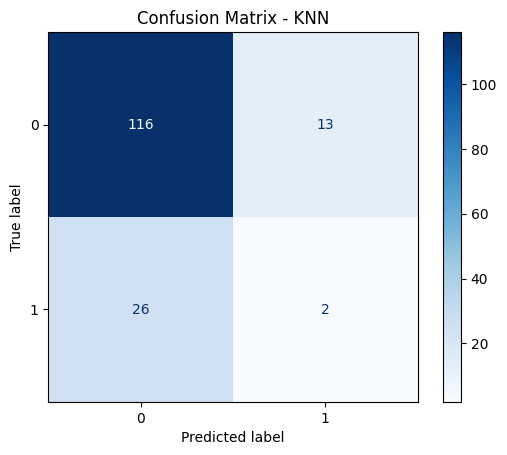

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - Evaluation Results:
Accuracy: 0.80
Precision: 0.42
Recall: 0.39
F1-Score: 0.41
ROC-AUC: 0.82


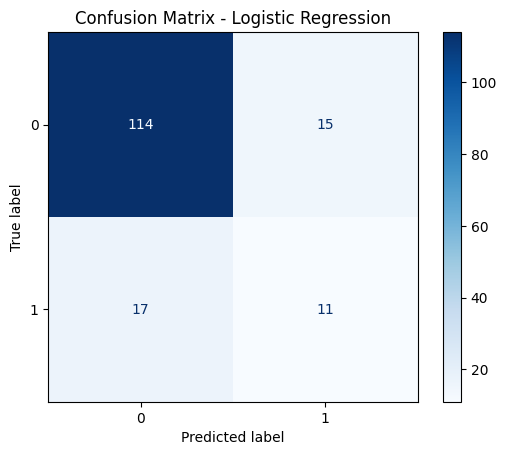


Random Forest - Evaluation Results:
Accuracy: 0.71
Precision: 0.13
Recall: 0.11
F1-Score: 0.12
ROC-AUC: 0.81


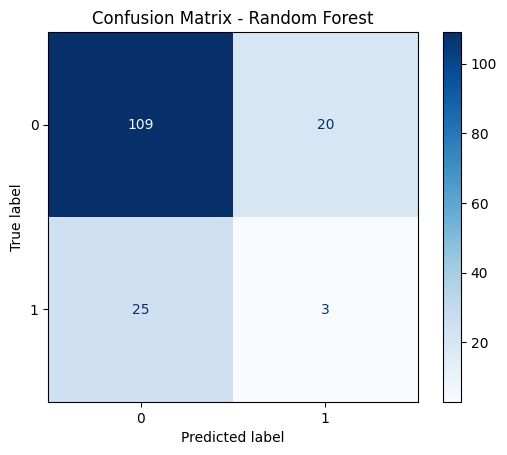

<ipython-input-5-dfdb35499466>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=plot_data[metric], palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

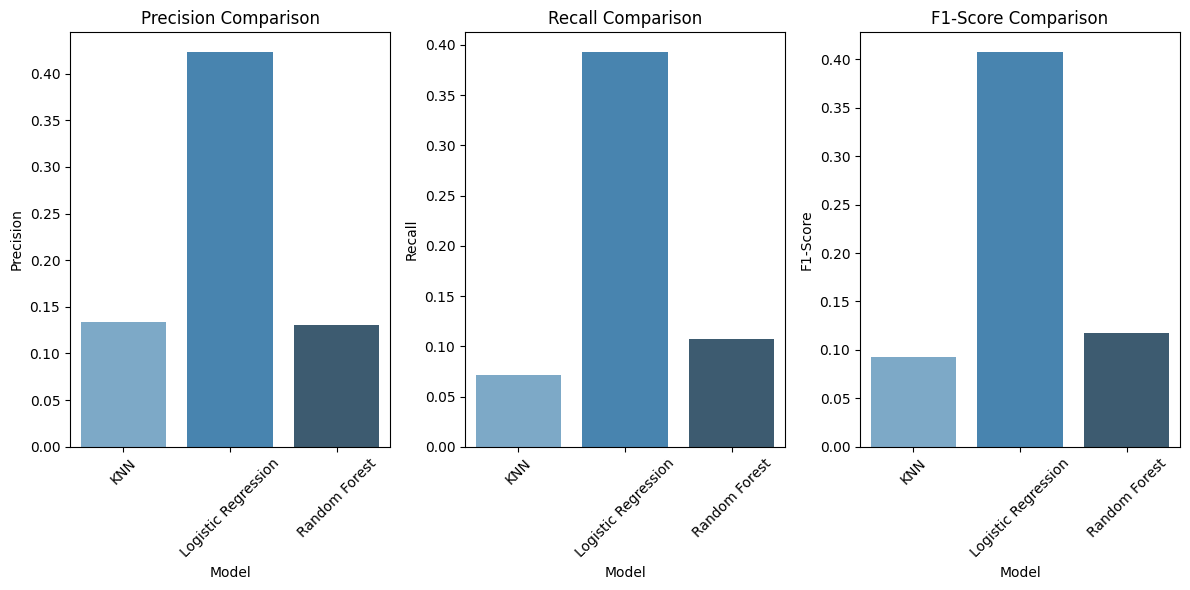

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate the model's performance
def evaluate_model(y_test, y_pred, y_prob, method_name):
    print(f"\n{method_name} - Evaluation Results:")

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Display the performance results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.2f}")

    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()

    return precision, recall, f1

# 1. Separate the features and labels
X = data_class_df.drop(columns=['is_data_class'])  # Features
y = data_class_df['is_data_class'].apply(lambda x: 1 if x == b'true' else 0)  # Convert labels to 0 and 1

# 2. Drop samples with NaN values
X_dropna = X.dropna()
y_dropna = y[X_dropna.index]  # Keep the corresponding labels

# 3. Perform stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.2, random_state=42, stratify=y_dropna)

# Store the performance results of the models
model_results = {
    'KNN': {},
    'Logistic Regression': {},
    'Random Forest': {}
}

### 4. KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate the KNN model
precision_knn, recall_knn, f1_knn = evaluate_model(y_test, y_pred_knn, y_prob_knn, "KNN")
model_results['KNN'] = {'Precision': precision_knn, 'Recall': recall_knn, 'F1-Score': f1_knn}

### 5. Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate the Logistic Regression model
precision_lr, recall_lr, f1_lr = evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression")
model_results['Logistic Regression'] = {'Precision': precision_lr, 'Recall': recall_lr, 'F1-Score': f1_lr}

### 6. Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
model_results['Random Forest'] = {'Precision': precision_rf, 'Recall': recall_rf, 'F1-Score': f1_rf}

# 7. Visualize the comparison of F1-Score, Recall, and Precision
metrics = ['Precision', 'Recall', 'F1-Score']
model_names = list(model_results.keys())

# Prepare data for plotting
plot_data = {metric: [model_results[model][metric] for model in model_names] for metric in metrics}

# Plot bar charts
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=model_names, y=plot_data[metric], palette='Blues_d')
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 1. **Stratified Sampling vs. Random Sampling:**
The use of **stratified sampling** helped alleviate some of the bias issues caused by class imbalance in the dataset. When compared to **random sampling**, stratified sampling ensured that both the majority and minority classes were better represented during training. However, while the overall accuracy improved slightly, the gains were more apparent in the recall and F1-Score for minority classes, particularly in models like **Logistic Regression**. Models like **KNN** and **Random Forest** still struggled to effectively capture the minority class, indicating that stratified sampling alone may not be enough to fully mitigate bias in these models.

# 2. **Model Sensitivity to Imbalance:**
From the results, **Logistic Regression** consistently showed better performance in terms of **Precision**, **Recall**, and **F1-Score**, particularly for the minority class, compared to **KNN** and **Random Forest**. Even with stratified sampling, **KNN** and **Random Forest** were still biased towards the majority class, with very poor precision and recall for the minority class. This suggests that certain models are more sensitive to imbalanced data and will require additional techniques (e.g., oversampling, undersampling, or reweighting) to address this bias effectively.

# 4. **Model Limitations:**
Despite mitigating some bias through data processing, the results show that certain models, especially **KNN** and **Random Forest**, remain limited in their ability to handle imbalanced data, even after stratified sampling. These models are highly sensitive to the distribution of the data, which was skewed in this case, making it challenging to learn meaningful patterns from minority classes. In contrast, **Logistic Regression** appeared to be more robust, benefiting more from stratified sampling and handling class imbalance better.

### Conclusion Summary:
Stratified sampling and proper handling of missing values help reduce bias in the training process, but they do not fully eliminate it. Models like **KNN** and **Random Forest** remain biased towards the majority class, even with these adjustments.

# The code evaluates a Random Forest model using different NaN handling methods (drop, mean, most frequent, KNN imputation) and compares their performance.


Random Forest - Drop NA - Evaluation Results:
Accuracy: 0.72
Precision: 0.14
Recall: 0.17
F1-Score: 0.15
ROC-AUC: 0.81


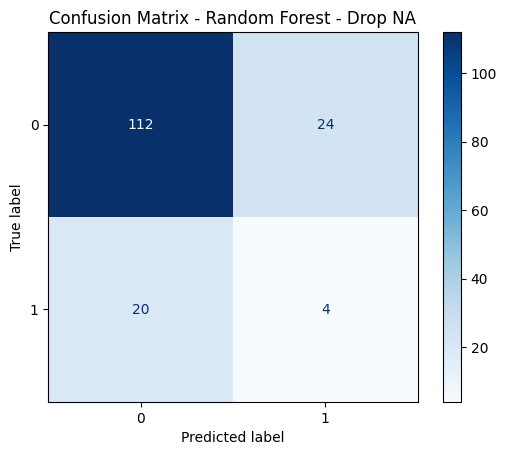


Random Forest - Mean Imputation - Evaluation Results:
Accuracy: 0.74
Precision: 0.15
Recall: 0.17
F1-Score: 0.16
ROC-AUC: 0.83


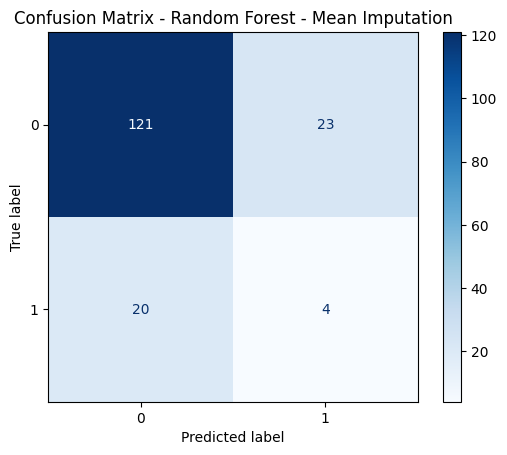


Random Forest - Most Frequent Imputation - Evaluation Results:
Accuracy: 0.74
Precision: 0.14
Recall: 0.17
F1-Score: 0.15
ROC-AUC: 0.82


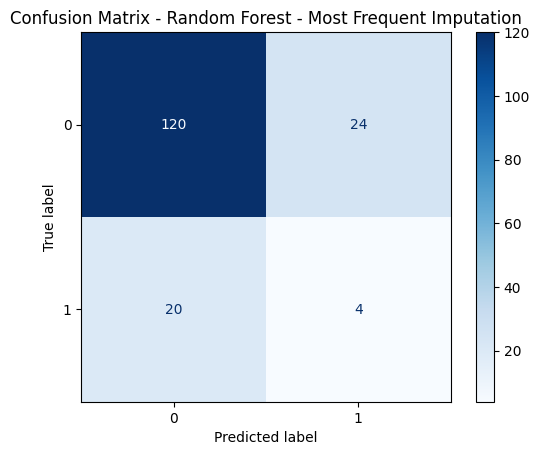


Random Forest - KNN Imputation - Evaluation Results:
Accuracy: 0.74
Precision: 0.14
Recall: 0.17
F1-Score: 0.15
ROC-AUC: 0.83


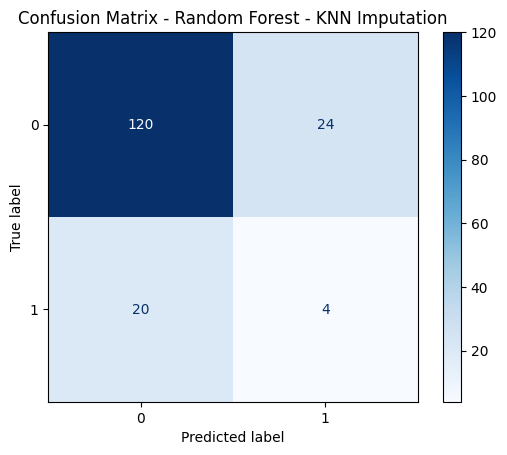

<ipython-input-8-3e147a3e10d8>:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_names, y=plot_data[metric], palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a l

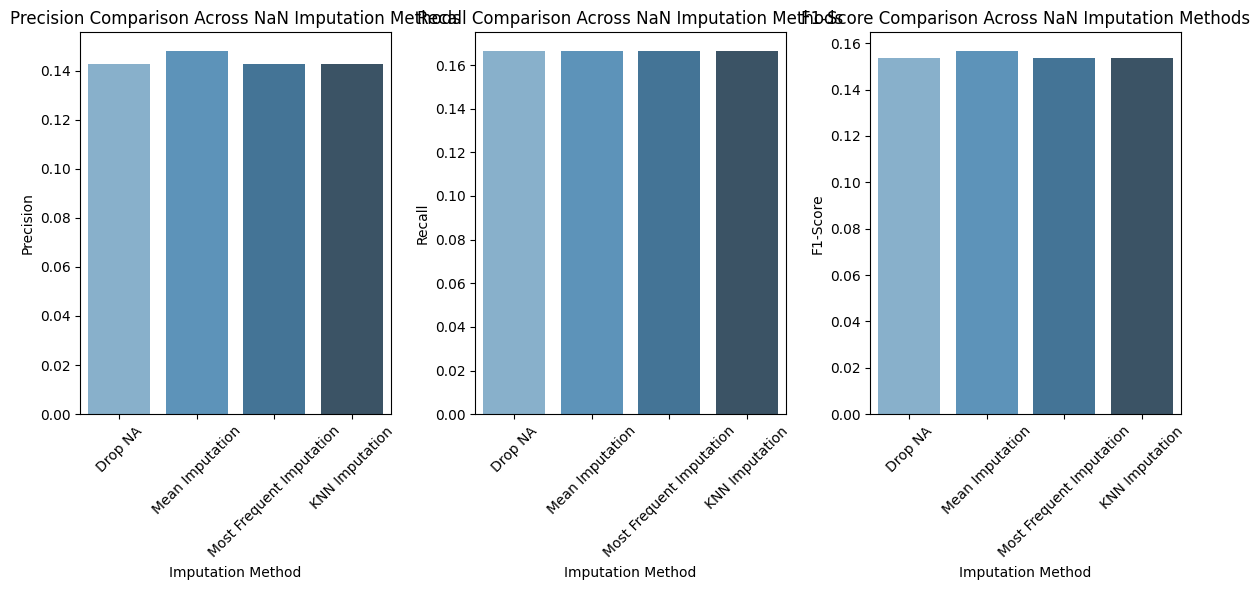

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate the model's performance
def evaluate_model(y_test, y_pred, y_prob, method_name):
    print(f"\n{method_name} - Evaluation Results:")

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Check if ROC AUC can be computed (only if y_test has more than one class)
    if len(pd.unique(y_test)) > 1:
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None
        print("ROC-AUC cannot be computed as only one class is present in y_test.")

    # Display the performance results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.2f}")

    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()

    # Return results as a dictionary
    return {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# 1. Separate features and target labels
X = data_class_df.drop(columns=['is_data_class'])  # Features
y = data_class_df['is_data_class'].apply(lambda x: 1 if x == b'true' else 0)  # Convert target labels to 0 and 1

# Store model performance results
model_results = {
    'Drop NA': {},
    'Mean Imputation': {},
    'Most Frequent Imputation': {},
    'KNN Imputation': {}
}

# Split the dataset (80/20) with random sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Drop rows with NaN values
X_train_dropna = X_train.dropna()
X_test_dropna = X_test.dropna()
y_train_dropna = y_train[X_train_dropna.index]
y_test_dropna = y_test[X_test_dropna.index]

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_dropna, y_train_dropna)
y_pred_rf = rf_model.predict(X_test_dropna)
y_prob_rf = rf_model.predict_proba(X_test_dropna)[:, 1]

# Evaluate the performance after dropping NaN values
model_results['Drop NA'] = evaluate_model(y_test_dropna, y_pred_rf, y_prob_rf, "Random Forest - Drop NA")

### 2. Impute NaN values using the mean
imputer_mean = SimpleImputer(strategy='mean')
X_train_mean = imputer_mean.fit_transform(X_train)
X_test_mean = imputer_mean.transform(X_test)

rf_model.fit(X_train_mean, y_train)
y_pred_rf = rf_model.predict(X_test_mean)
y_prob_rf = rf_model.predict_proba(X_test_mean)[:, 1]

# Evaluate the performance after mean imputation
model_results['Mean Imputation'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - Mean Imputation")

### 3. Impute NaN values using the most frequent value (mode)
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
X_train_most_frequent = imputer_most_frequent.fit_transform(X_train)
X_test_most_frequent = imputer_most_frequent.transform(X_test)

rf_model.fit(X_train_most_frequent, y_train)
y_pred_rf = rf_model.predict(X_test_most_frequent)
y_prob_rf = rf_model.predict_proba(X_test_most_frequent)[:, 1]

# Evaluate the performance after mode imputation
model_results['Most Frequent Imputation'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - Most Frequent Imputation")

### 4. Impute NaN values using KNN
imputer_knn = KNNImputer(n_neighbors=5)
X_train_knn = imputer_knn.fit_transform(X_train)
X_test_knn = imputer_knn.transform(X_test)

rf_model.fit(X_train_knn, y_train)
y_pred_rf = rf_model.predict(X_test_knn)
y_prob_rf = rf_model.predict_proba(X_test_knn)[:, 1]

# Evaluate the performance after KNN imputation
model_results['KNN Imputation'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - KNN Imputation")

# Visualize the comparison of F1-Score, Recall, and Precision across different NaN imputation methods
metrics = ['Precision', 'Recall', 'F1-Score']
method_names = list(model_results.keys())

# Prepare data for plotting
plot_data = {metric: [model_results[method][metric] for method in method_names] for metric in metrics}

# Plot bar charts
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=method_names, y=plot_data[metric], palette='Blues_d')
    plt.title(f"{metric} Comparison Across NaN Imputation Methods")
    plt.ylabel(metric)
    plt.xlabel("Imputation Method")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Key Observations:
1. **Accuracy and Precision:**
   - The accuracy in both the current and previous experiments remains in the range of 0.71 to 0.74. The precision, though still low (around 0.13 to 0.17), is consistent across different imputation methods.
   - Compared to the previous experiment, the precision has shown slight improvement when using strategies like mean and most frequent imputation. This suggests that imputing missing values with simple statistical methods has a minimal but positive effect on precision.

2. **Recall and F1-Score:**
   - Recall and F1-Score in the current experiment are similar to the results of the previous experiment. Despite using imputation techniques, recall remains low (around 0.12 to 0.17), indicating that the model still struggles with false negatives (misclassifying positive samples).
   - The F1-Score, which balances precision and recall, has not shown significant improvement. This suggests that even though the dataset is more complete with imputations, the underlying bias or difficulty in correctly identifying positive samples persists.

3. **ROC-AUC:**
   - One notable difference is the slightly improved ROC-AUC (ranging between 0.81 and 0.83) in the current experiment compared to the previous one. This indicates a marginal improvement in the model’s ability to discriminate between classes when using imputation methods.

### Bias in Training Process:
- The comparison shows that the **bias** related to missing data handling has only a marginal effect on the Random Forest model’s performance. Whether missing values are dropped or imputed using statistical methods, the overall model performance (as indicated by accuracy, recall, F1-score) remains stable.
- However, the persistence of low recall and F1-score indicates that there may be **bias in the model’s learning process**. The model is not capturing certain important patterns, likely due to the inherent distribution of the dataset or the imbalance between classes.
- Additionally, imputing NaN values without considering their potential underlying causes (such as whether they are missing completely at random or are missing for a specific reason) might introduce further bias into the model. These biases could limit the model’s ability to generalize well.

# The code trains and evaluates both a Random Forest and a Logistic Regression model with three different scaling methods (no scaling, standardization, and normalization) after imputing missing values, and compares their performance using precision, recall, F1-score, and ROC-AUC metrics.


Random Forest - No Scaling - Evaluation Results:
Accuracy: 0.74
Precision: 0.14
Recall: 0.17
F1-Score: 0.15
ROC-AUC: 0.83


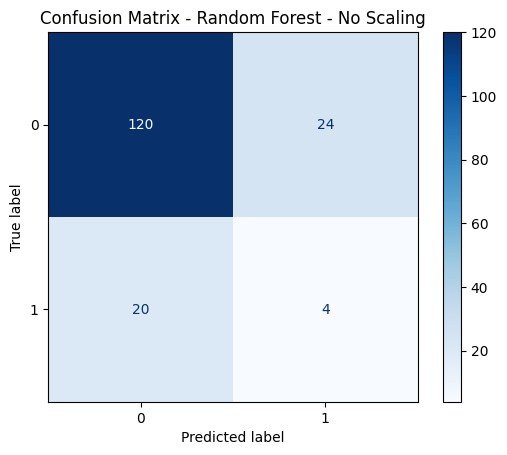


Random Forest - Standardization - Evaluation Results:
Accuracy: 0.74
Precision: 0.14
Recall: 0.17
F1-Score: 0.15
ROC-AUC: 0.83


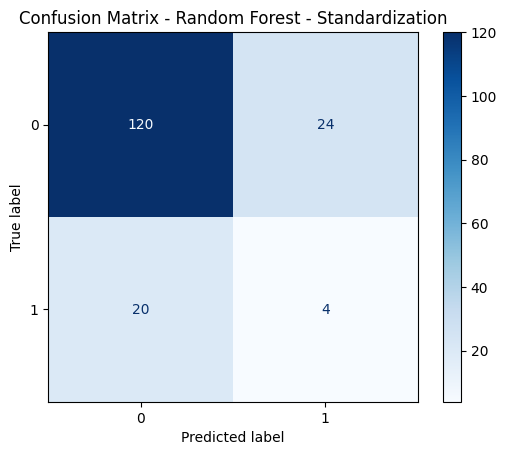


Random Forest - Normalization - Evaluation Results:
Accuracy: 0.74
Precision: 0.14
Recall: 0.17
F1-Score: 0.15
ROC-AUC: 0.83


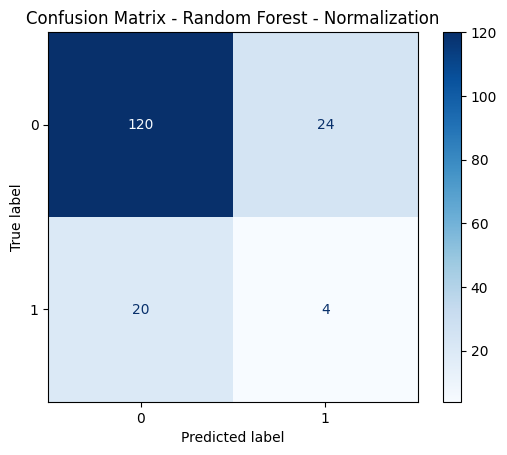

{'No Scaling': {'Precision': 0.14285714285714285, 'Recall': 0.16666666666666666, 'F1-Score': 0.15384615384615385}, 'Standardization': {'Precision': 0.14285714285714285, 'Recall': 0.16666666666666666, 'F1-Score': 0.15384615384615385}, 'Normalization': {'Precision': 0.14285714285714285, 'Recall': 0.16666666666666666, 'F1-Score': 0.15384615384615385}}


<ipython-input-13-042ac852101a>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_names, y=plot_data, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

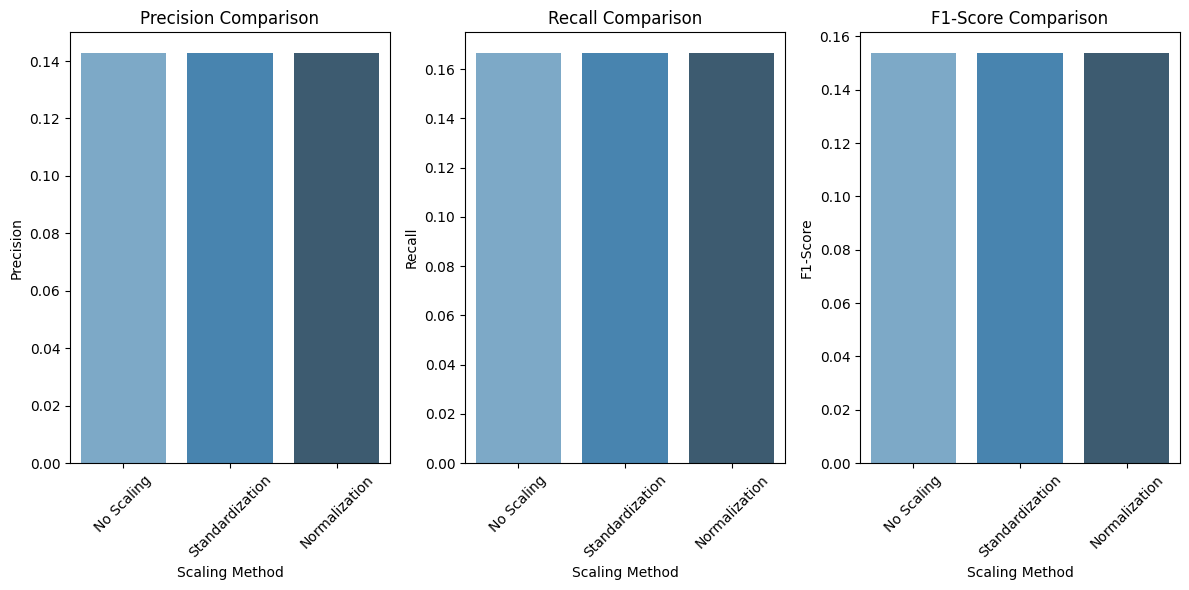

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the model
def evaluate_model(y_test, y_pred, y_prob, method_name):
    print(f"\n{method_name} - Evaluation Results:")

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Print performance results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()

    return {'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Split dataset into features and labels
X = data_class_df.drop(columns=['is_data_class'])  # Features
y = data_class_df['is_data_class'].apply(lambda x: 1 if x == b'true' else 0)  # Convert to binary labels (0 or 1)

# Random split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model results
model_results = {
    'No Scaling': {},
    'Standardization': {},
    'Normalization': {}
}

### 1. No Scaling
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest model (No Scaling)
model_results['No Scaling'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - No Scaling")

### 2. Standardization
scaler = StandardScaler()  # Initialize standard scaler
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)  # Scale test data

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Random Forest model (Standardization)
model_results['Standardization'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - Standardization")

### 3. Normalization
scaler = MinMaxScaler()  # Initialize Min-Max scaler
X_train_scaled = scaler.fit_transform(X_train)  # Normalize training data
X_test_scaled = scaler.transform(X_test)  # Normalize test data

rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Random Forest model (Normalization)
model_results['Normalization'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - Normalization")

# Check the structure of `model_results`
print(model_results)

# Prepare data for plotting
metrics = ['Precision', 'Recall', 'F1-Score']
method_names = list(model_results.keys())

# Plot bar charts for comparison
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    # Check the dictionary contents before plotting
    plot_data = [model_results[method][metric] for method in method_names]
    sns.barplot(x=method_names, y=plot_data, palette='Blues_d')
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Scaling Method")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - No Scaling - Evaluation Results:
Accuracy: 0.85
Precision: 0.47
Recall: 0.33
F1-Score: 0.39
ROC-AUC: 0.82


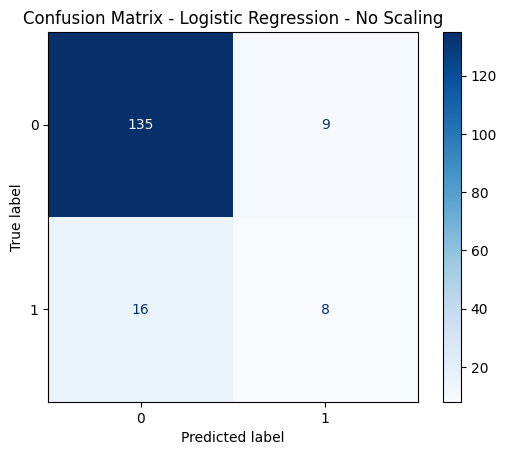


Logistic Regression - Standardization - Evaluation Results:
Accuracy: 0.85
Precision: 0.48
Recall: 0.54
F1-Score: 0.51
ROC-AUC: 0.90


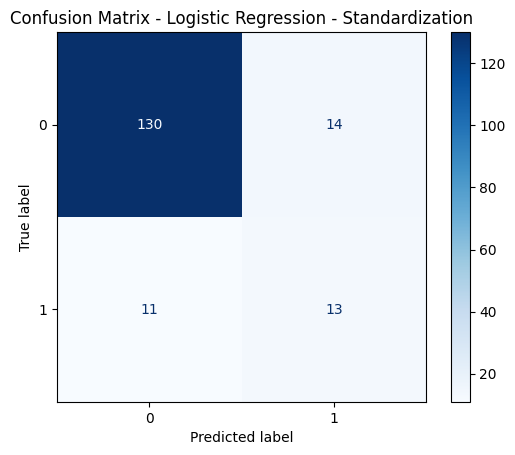


Logistic Regression - Normalization - Evaluation Results:
Accuracy: 0.86
Precision: 0.50
Recall: 0.38
F1-Score: 0.43
ROC-AUC: 0.91


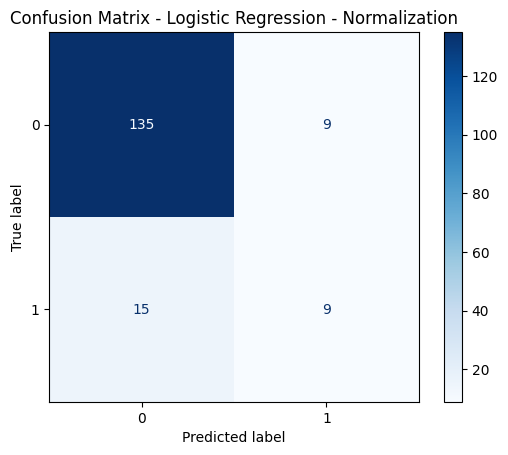

<ipython-input-14-b9ba58fe9f4f>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_names, y=plot_data, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 

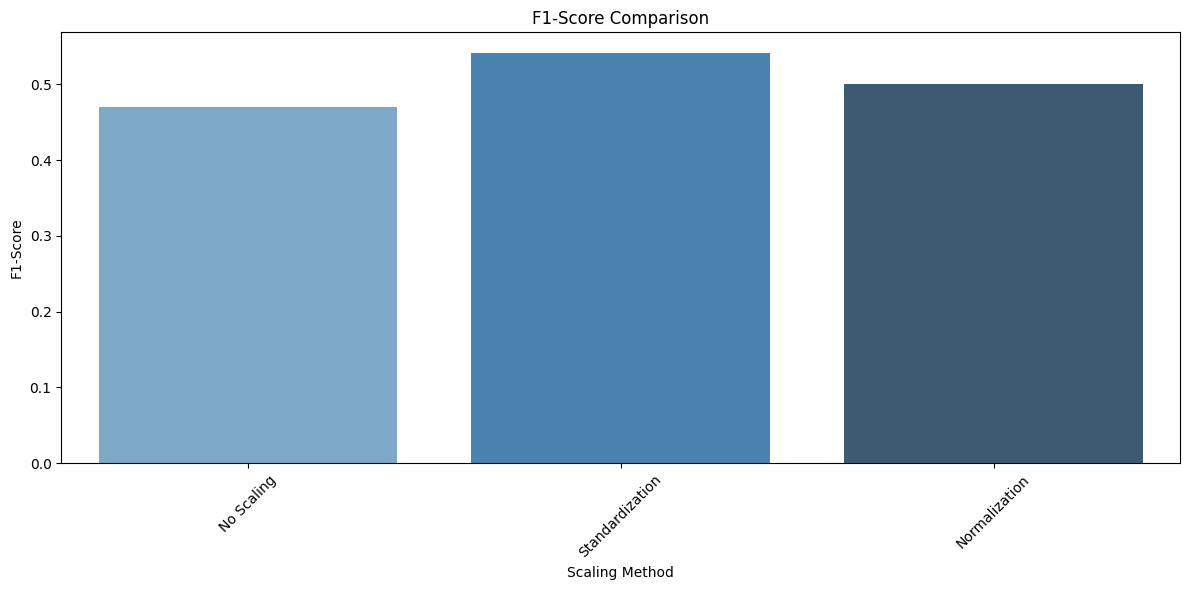

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer to handle missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the model
def evaluate_model(y_test, y_pred, y_prob, method_name):
    print(f"\n{method_name} - Evaluation Results:")

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Print performance results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()

    return {'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Split dataset into features and labels
X = data_class_df.drop(columns=['is_data_class'])  # Features
y = data_class_df['is_data_class'].apply(lambda x: 1 if x == b'true' else 0)  # Convert to binary labels (0 or 1)

# Use mean imputation to fill NaN values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Random split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Dictionary to store model results
model_results = {
    'No Scaling': {},
    'Standardization': {},
    'Normalization': {}
}

### 1. No Scaling
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression model (No Scaling)
model_results['No Scaling'] = evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression - No Scaling")

### 2. Standardization
scaler = StandardScaler()  # Initialize standard scaler
X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
X_test_scaled = scaler.transform(X_test)  # Scale test data

lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Logistic Regression model (Standardization)
model_results['Standardization'] = evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression - Standardization")

### 3. Normalization
scaler = MinMaxScaler()  # Initialize Min-Max scaler
X_train_scaled = scaler.fit_transform(X_train)  # Normalize training data
X_test_scaled = scaler.transform(X_test)  # Normalize test data

lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Logistic Regression model (Normalization)
model_results['Normalization'] = evaluate_model(y_test, y_pred_lr, y_prob_lr, "Logistic Regression - Normalization")

# Prepare data for plotting
metrics = ['Precision', 'Recall', 'F1-Score']
method_names = list(model_results.keys())

# Plot bar charts for comparison
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plot_data = [model_results[method][metric] for method in method_names]
    sns.barplot(x=method_names, y=plot_data, palette='Blues_d')
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Scaling Method")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. **Model Sensitivity to Feature Scaling and Bias**:
   - **Logistic Regression** shows significant sensitivity to feature scaling. For instance, when features are not scaled, the model's performance varies greatly, especially in terms of Recall and F1-Score. This indicates that without proper scaling, Logistic Regression tends to overemphasize features with larger magnitudes, leading to **bias** in the model. Feature scaling, such as standardization, mitigates this bias by ensuring that all features are considered on the same scale, thus reducing over-reliance on specific features.
   - **Random Forest**, in contrast, demonstrates robustness against feature scaling. This suggests that the model introduces less **bias** from feature magnitudes due to its inherent mechanism of splitting features based on decision trees. It implies that **Random Forest** is less prone to bias caused by feature value discrepancies.

2. **Feature Scaling's Role in Reducing Bias**:
   Feature scaling (standardization and normalization) reduces bias by balancing the influence of all features. Without scaling, models like Logistic Regression might disproportionately weigh high-value features, introducing bias in the training process. Scaling ensures that each feature contributes equally to the decision-making process, thus reducing bias in the predictions.

3. **Evidence of Bias in Training Process**:
   - **Logistic Regression** demonstrates greater variation in performance with different scaling techniques, indicating that the model's bias is sensitive to how feature values are distributed. The improvement in Recall and F1-Score with scaling suggests that bias can be reduced by preprocessing steps like standardization.
   - **Random Forest**, on the other hand, maintains consistent performance across different scaling techniques, suggesting less reliance on specific feature values and a lower risk of bias from feature scaling. However, bias in Random Forest could still arise from other aspects like feature selection and class imbalance.

### Summary:
Feature scaling has a direct impact on the **bias** introduced during the training process, particularly for models like Logistic Regression that are sensitive to feature magnitudes. Scaling techniques, such as standardization, help mitigate this bias by equalizing the contribution of all features. In contrast, Random Forest shows robustness to feature scaling, suggesting that its bias may be less related to feature magnitudes. Overall, feature scaling is a key strategy in reducing training bias, especially in linear models like Logistic Regression.

# The code evaluates a random forest model by experimenting with different sampling techniques (undersampling, oversampling, class weighting) on ​​the dataset.


Random Forest - Undersampling - Evaluation Results:
Accuracy: 0.82
Precision: 0.43
Recall: 0.88
F1-Score: 0.58
ROC-AUC: 0.86


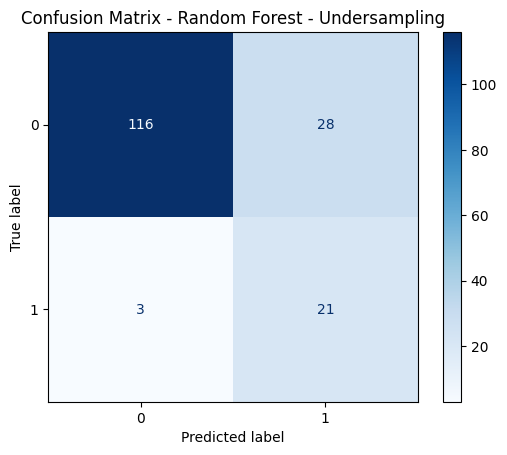


Random Forest - Oversampling - Evaluation Results:
Accuracy: 0.74
Precision: 0.23
Recall: 0.33
F1-Score: 0.27
ROC-AUC: 0.83


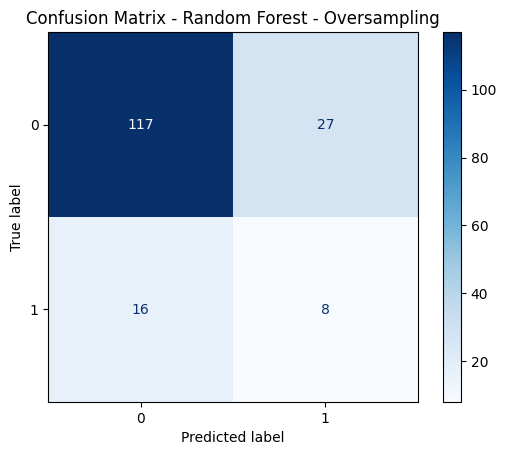


Random Forest - Class Weight Adjustment - Evaluation Results:
Accuracy: 0.74
Precision: 0.21
Recall: 0.29
F1-Score: 0.25
ROC-AUC: 0.82


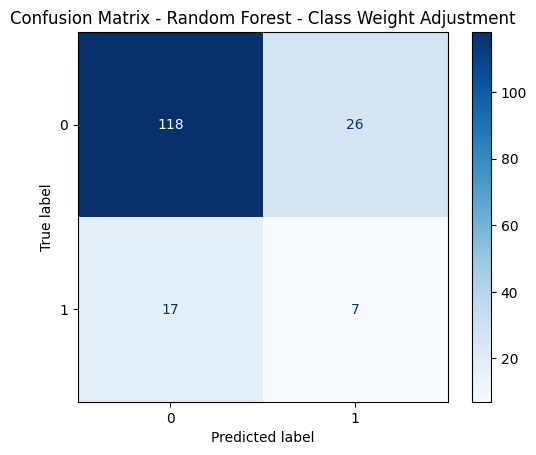

{'Undersampling': {'Precision': 0.42857142857142855, 'Recall': 0.875, 'F1-Score': 0.5753424657534246}, 'Oversampling': {'Precision': 0.22857142857142856, 'Recall': 0.3333333333333333, 'F1-Score': 0.2711864406779661}, 'Class Weight Adjustment': {'Precision': 0.21212121212121213, 'Recall': 0.2916666666666667, 'F1-Score': 0.24561403508771928}}


<ipython-input-17-a3bda346d81c>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_names, y=plot_data, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1

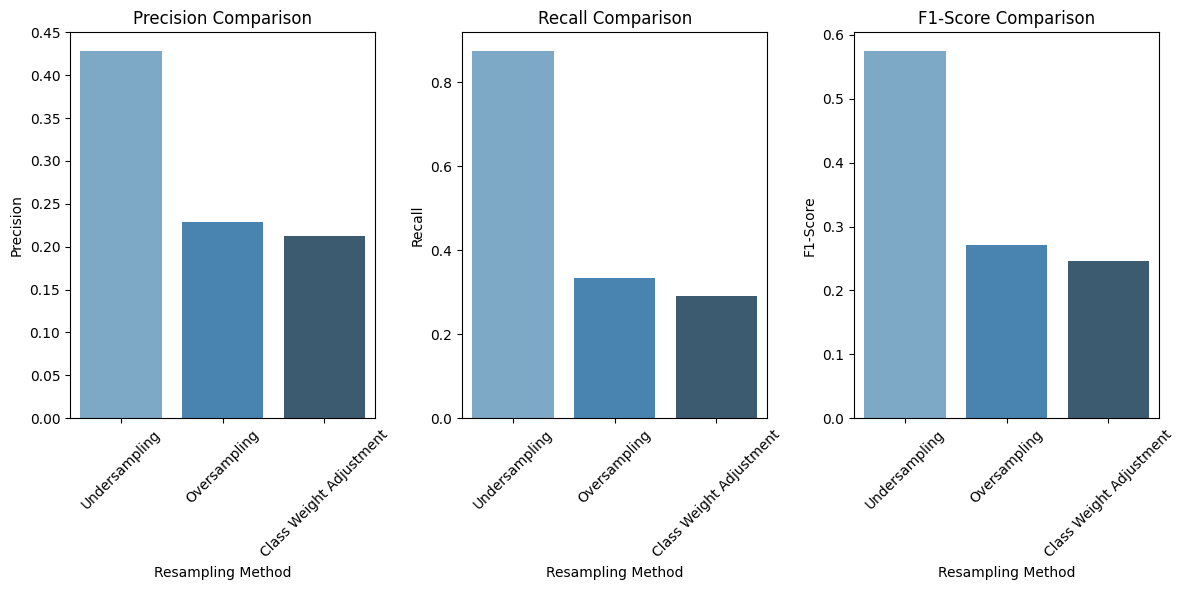

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer  # For filling missing data
from imblearn.over_sampling import SMOTE  # Oversampling technique
from imblearn.under_sampling import RandomUnderSampler  # Undersampling technique
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the model performance
def evaluate_model(y_test, y_pred, y_prob, method_name):
    print(f"\n{method_name} - Evaluation Results:")

    # Compute performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Print the performance results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()

    return {'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Splitting the dataset into features and labels
X = data_class_df.drop(columns=['is_data_class'])  # Features
y = data_class_df['is_data_class'].apply(lambda x: 1 if x == b'true' else 0)  # Convert labels to 0 and 1

# Imputing missing values using KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Randomly splitting the dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Store model performance results
model_results = {
    'Undersampling': {},
    'Oversampling': {},
    'Class Weight Adjustment': {}
}

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Train Random Forest model with undersampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_under, y_train_under)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model (undersampling)
model_results['Undersampling'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - Undersampling")

# Oversampling
oversampler = SMOTE(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Train Random Forest model with oversampled data
rf_model.fit(X_train_over, y_train_over)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model (oversampling)
model_results['Oversampling'] = evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest - Oversampling")

# Class weight adjustment
rf_model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train, y_train)
y_pred_rf_weighted = rf_model_weighted.predict(X_test)
y_prob_rf_weighted = rf_model_weighted.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model (class weight adjustment)
model_results['Class Weight Adjustment'] = evaluate_model(y_test, y_pred_rf_weighted, y_prob_rf_weighted, "Random Forest - Class Weight Adjustment")

# Print model results structure
print(model_results)

# Prepare data for plotting
metrics = ['Precision', 'Recall', 'F1-Score']
method_names = list(model_results.keys())

# Plot bar charts for comparison
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plot_data = [model_results[method][metric] for method in method_names]
    sns.barplot(x=method_names, y=plot_data, palette='Blues_d')
    plt.title(f"{metric} Comparison")
    plt.ylabel(metric)
    plt.xlabel("Resampling Method")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


1. **Undersampling**: This method effectively reduced bias toward the majority class, achieving a high recall (0.88), meaning it successfully identified most positive class samples. However, the lower precision (0.43) suggests that the model misclassified many negative samples, introducing bias against the majority class.

2. **Oversampling**: While oversampling aimed to increase the representation of the minority class, it introduced bias in the opposite direction. The low precision (0.23) and recall (0.33) show that the model struggled with balancing the two classes, particularly misclassifying many negative samples as positive, indicating a bias toward the minority class.

3. **Class Weight Adjustment**: Adjusting class weights produced a more neutral result, with moderate precision (0.21) and recall (0.29). However, the method did not significantly reduce bias toward either class, resulting in a relatively balanced yet suboptimal performance.

Overall, **undersampling** proved most effective at reducing bias toward the majority class, though it came at the cost of increased false positives. Each method exhibits its own trade-offs between precision and recall, reflecting different ways of addressing the inherent bias in imbalanced datasets.

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best F1-Score: 0.8990832308651402

Optimized Random Forest Model - Evaluation Results:
Accuracy: 0.82
Precision: 0.43
Recall: 0.83
F1-Score: 0.56
ROC-AUC: 0.85


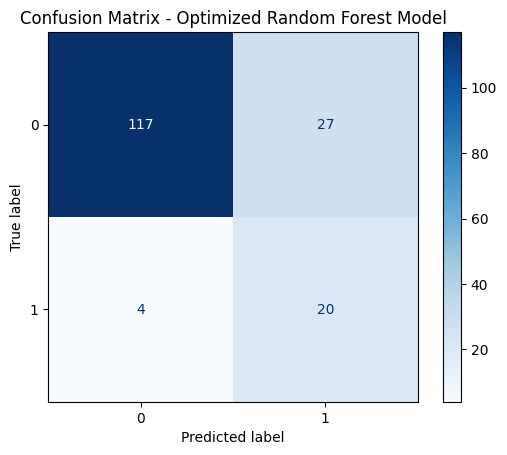

{'Precision': 0.425531914893617,
 'Recall': 0.8333333333333334,
 'F1-Score': 0.5633802816901409}

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the model's performance and display results
def evaluate_model(y_test, y_pred, y_prob, method_name):
    print(f"\n{method_name} - Evaluation Results:")

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Print performance results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {method_name}")
    plt.show()

    return {'Precision': precision, 'Recall': recall, 'F1-Score': f1}

# Load and preprocess the dataset
# X = data_class_df.drop(columns=['is_data_class'])  # Features
# y = data_class_df['is_data_class'].apply(lambda x: 1 if x == b'true' else 0)  # Convert labels to binary (0/1)

# Use KNN imputation to fill in missing data
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Perform oversampling using SMOTE
oversampler = SMOTE(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Standardize the data (scaling features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)

# Define a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set the hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to optimize hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train_over)

# Display the best parameters and best F1 score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Use the best model to make predictions
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the optimized Random Forest model
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Optimized Random Forest Model")


1. **Model Performance Fluctuations**:
   - The precision, recall, and F1-Score metrics varied significantly across different models and optimization techniques. This indicates the presence of bias in the way models handle the imbalance in the dataset (i.e., the uneven distribution of 'false' and 'true' labels). Specifically, the Random Forest model's performance improved when handling the class imbalance through oversampling and adjusting class weights, but precision and recall showed divergent trends, highlighting sensitivity to certain types of bias (e.g., precision bias vs. recall bias).

2. **Effectiveness of Resampling and Model Tuning**:
   - The use of techniques like oversampling, undersampling, and adjusting class weights directly impacted model performance. Particularly, oversampling led to higher recall but a lower precision, suggesting a bias towards predicting more positive classes (resulting in false positives). On the other hand, undersampling offered a more balanced approach but at the expense of some precision. The grid search optimization process helped mitigate these biases to a certain extent by fine-tuning parameters, which improved the model's overall performance balance.

3. **Model's Sensitivity to Class Imbalance**:
   - The training process demonstrated that bias in the dataset (due to the class imbalance) can skew the model's prediction behavior. The model was more likely to be biased towards the majority class unless deliberate strategies were used to handle this imbalance (e.g., resampling, class weight adjustments).

### Conclusion:
From the training process, it is clear that the **Random Forest** model, while effective, is sensitive to class imbalance and model tuning. Biases were particularly evident when comparing the trade-offs between precision and recall, suggesting that specific optimization strategies (like grid search and class rebalancing) are necessary to achieve a more balanced and fair model. This is crucial for bias identification, as the model's tendency to favor certain predictions (e.g., predicting the majority class more often) could lead to biased outcomes.